In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [2]:
confirmed = pd.read_csv('files/time_series_covid19_confirmed_US.csv')
death = pd.read_csv('files/time_series_covid19_deaths_US.csv')

In [3]:
confirmed

UID iso2 iso3  code3  FIPS          Admin2  \
0           16   AS  ASM     16  60.0             NaN   
1          316   GU  GUM    316  66.0             NaN   
2          580   MP  MNP    580  69.0             NaN   
3          630   PR  PRI    630  72.0             NaN   
4          850   VI  VIR    850  78.0             NaN   
...        ...  ...  ...    ...   ...             ...   
3256  84070016   US  USA    840   NaN    Central Utah   
3257  84070017   US  USA    840   NaN  Southeast Utah   
3258  84070018   US  USA    840   NaN  Southwest Utah   
3259  84070019   US  USA    840   NaN       TriCounty   
3260  84070020   US  USA    840   NaN    Weber-Morgan   

                Province_State Country_Region        Lat       Long_  ...  \
0               American Samoa             US -14.271000 -170.132000  ...   
1                         Guam             US  13.444300  144.793700  ...   
2     Northern Mariana Islands             US  15.097900  145.673900  ...   
3                  Puerto Rico             US  18.220800  -66.590100  ...   
4               Virgin Islands             US  18.335800  -64.896300  ...   
...                        ...            ...        ...         ...  ...   
3256                      Utah             US  39.372319 -111.575868  ...   
3257                      Utah             US  38.996171 -110.701396  ...   
3258                      Utah             US  37.854472 -111.441876  ...   
3259                      Utah             US  40.124915 -109.517442  ...   
3260                      Utah             US  41.271160 -111.914512  ...   

     6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  6/25/20  6/26/20  \
0          0        0        0        0        0        0        0        0   
1        200      222      222      222      225      226      231      247   
2         30       30       30       30       30       30       30       30   
3       6195     6463     6525     6564     6685     6820     6877     6922   
4         73       73       76       76       76       76       80       81   
...      ...      ...      ...      ...      ...      ...      ...      ...   
3256      89       96      102      110      114      117      117      127   
3257      31       31       31       31       31       32       32       33   
3258     974     1031     1056     1104     1151     1200     1258     1302   
3259      38       38       38       39       39       40       42       45   
3260     616      641      666      676      708      734      779      814   

      6/27/20  6/28/20  
0           0        0  
1         247      247  
2          30       30  
3        7066     7189  
4          81       81  
...       ...      ...  
3256      134      143  
3257       34       35  
3258     1361     1428  
3259       46       48  
3260      846      872  

[3261 rows x 170 columns]

In [4]:
dates = [x for x in list(confirmed.columns) if re.search('/',x)]

In [5]:
confirmed_clean = confirmed.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Cases'})
confirmed_clean['Date'] = pd.to_datetime(confirmed_clean['Date'], errors ='coerce')
confirmed_clean.set_index('Date',inplace = True)
confirmed_clean

County            Province_State Country_Region  \
Date                                                                  
2020-01-22             NaN            American Samoa             US   
2020-01-22             NaN                      Guam             US   
2020-01-22             NaN  Northern Mariana Islands             US   
2020-01-22             NaN               Puerto Rico             US   
2020-01-22             NaN            Virgin Islands             US   
...                    ...                       ...            ...   
2020-06-28    Central Utah                      Utah             US   
2020-06-28  Southeast Utah                      Utah             US   
2020-06-28  Southwest Utah                      Utah             US   
2020-06-28       TriCounty                      Utah             US   
2020-06-28    Weber-Morgan                      Utah             US   

                  Lat       Long_                  Combined_Key  Total Cases  
Date                                                                          
2020-01-22 -14.271000 -170.132000            American Samoa, US            0  
2020-01-22  13.444300  144.793700                      Guam, US            0  
2020-01-22  15.097900  145.673900  Northern Mariana Islands, US            0  
2020-01-22  18.220800  -66.590100               Puerto Rico, US            0  
2020-01-22  18.335800  -64.896300            Virgin Islands, US            0  
...               ...         ...                           ...          ...  
2020-06-28  39.372319 -111.575868        Central Utah, Utah, US          143  
2020-06-28  38.996171 -110.701396      Southeast Utah, Utah, US           35  
2020-06-28  37.854472 -111.441876      Southwest Utah, Utah, US         1428  
2020-06-28  40.124915 -109.517442           TriCounty, Utah, US           48  
2020-06-28  41.271160 -111.914512        Weber-Morgan, Utah, US          872  

[518499 rows x 7 columns]

In [6]:
# confirmed_clean.to_csv('US_confirmed.csv')

In [7]:
death_clean = death.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Death'})
death_clean['Date'] = pd.to_datetime(death_clean['Date'])
death_clean.set_index('Date',inplace = True)
death_clean

County            Province_State Country_Region  \
Date                                                                  
2020-01-22             NaN            American Samoa             US   
2020-01-22             NaN                      Guam             US   
2020-01-22             NaN  Northern Mariana Islands             US   
2020-01-22             NaN               Puerto Rico             US   
2020-01-22             NaN            Virgin Islands             US   
...                    ...                       ...            ...   
2020-06-28    Central Utah                      Utah             US   
2020-06-28  Southeast Utah                      Utah             US   
2020-06-28  Southwest Utah                      Utah             US   
2020-06-28       TriCounty                      Utah             US   
2020-06-28    Weber-Morgan                      Utah             US   

                  Lat       Long_                  Combined_Key  Total Death  
Date                                                                          
2020-01-22 -14.271000 -170.132000            American Samoa, US            0  
2020-01-22  13.444300  144.793700                      Guam, US            0  
2020-01-22  15.097900  145.673900  Northern Mariana Islands, US            0  
2020-01-22  18.220800  -66.590100               Puerto Rico, US            0  
2020-01-22  18.335800  -64.896300            Virgin Islands, US            0  
...               ...         ...                           ...          ...  
2020-06-28  39.372319 -111.575868        Central Utah, Utah, US            0  
2020-06-28  38.996171 -110.701396      Southeast Utah, Utah, US            0  
2020-06-28  37.854472 -111.441876      Southwest Utah, Utah, US           10  
2020-06-28  40.124915 -109.517442           TriCounty, Utah, US            0  
2020-06-28  41.271160 -111.914512        Weber-Morgan, Utah, US           12  

[518499 rows x 7 columns]

In [8]:
# death_clean.to_csv('US_death.csv')

In [9]:
states = list(confirmed_clean['Province_State'].unique())

### Daily New Cases and Death for Each State

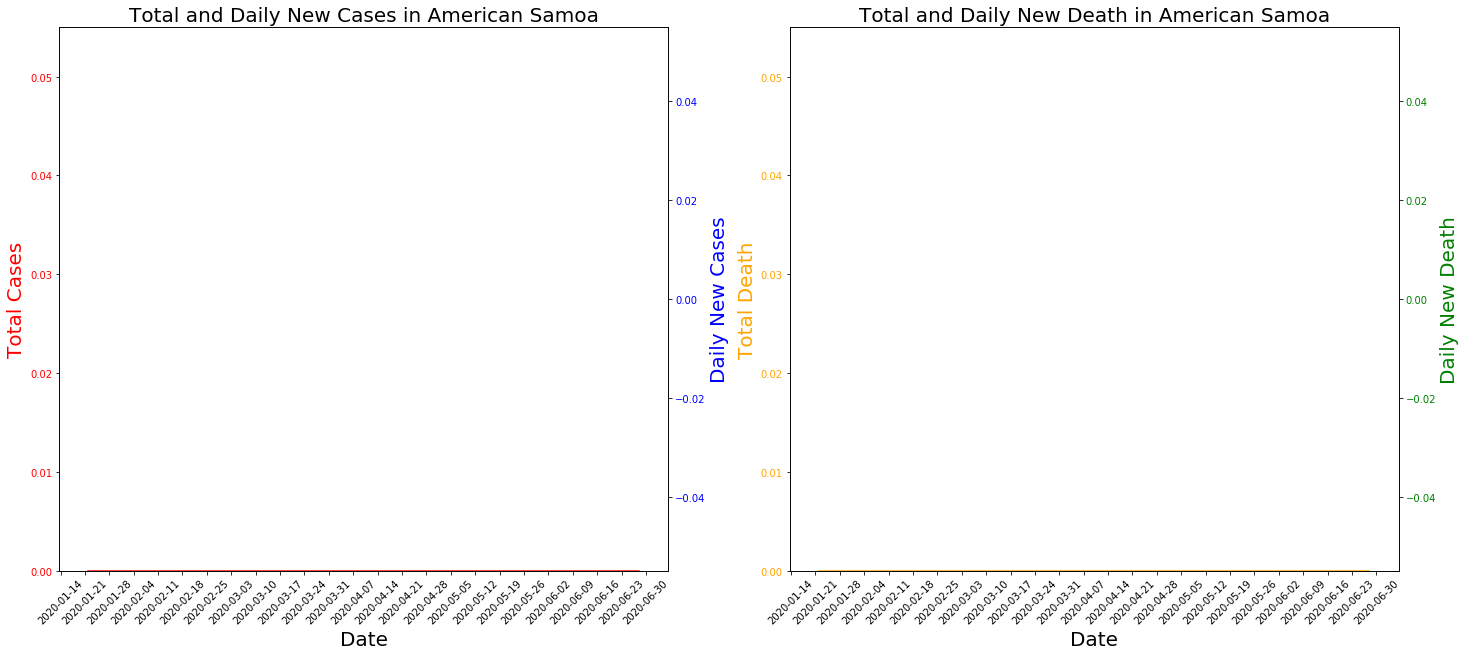

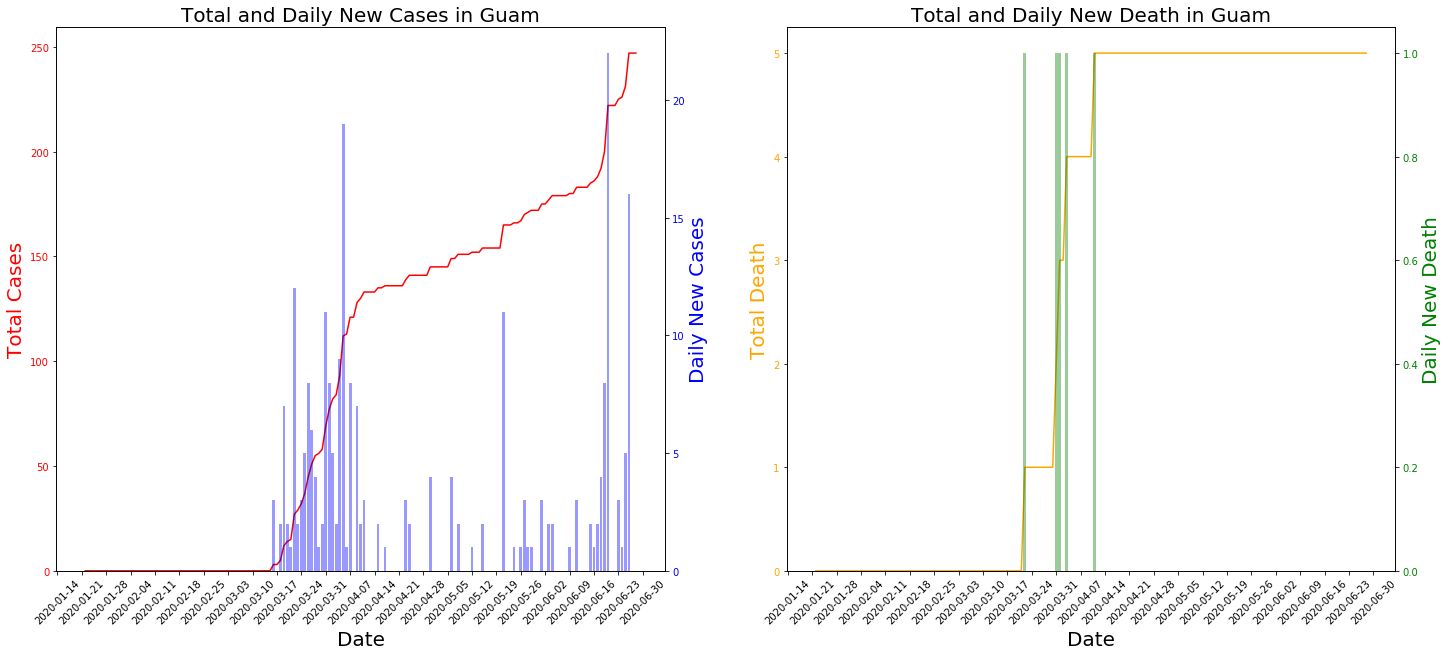

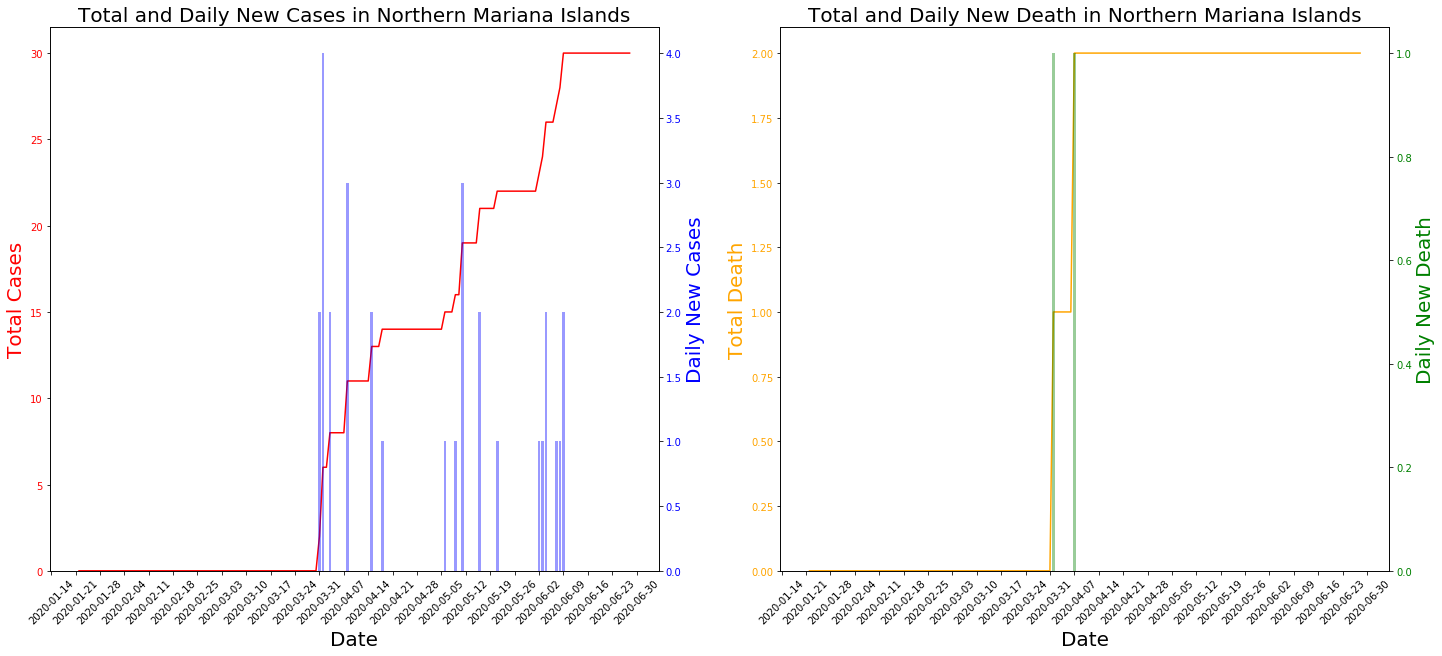

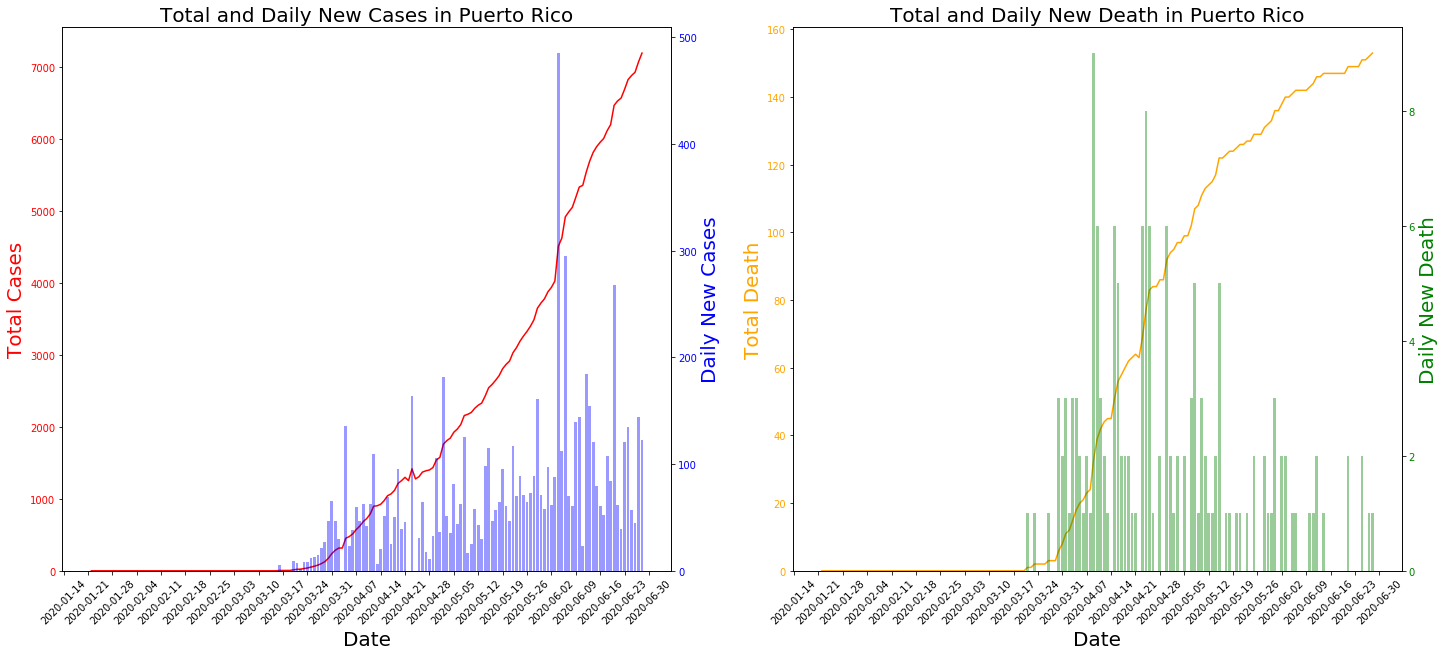

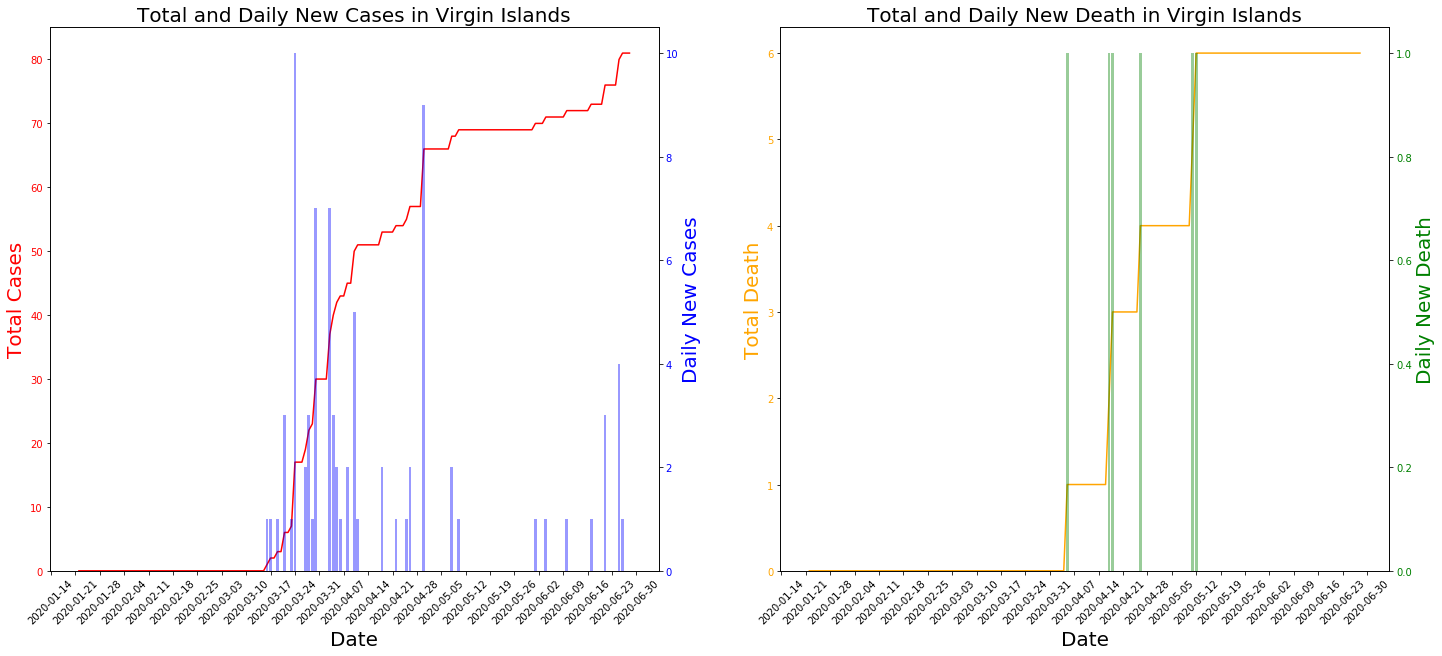

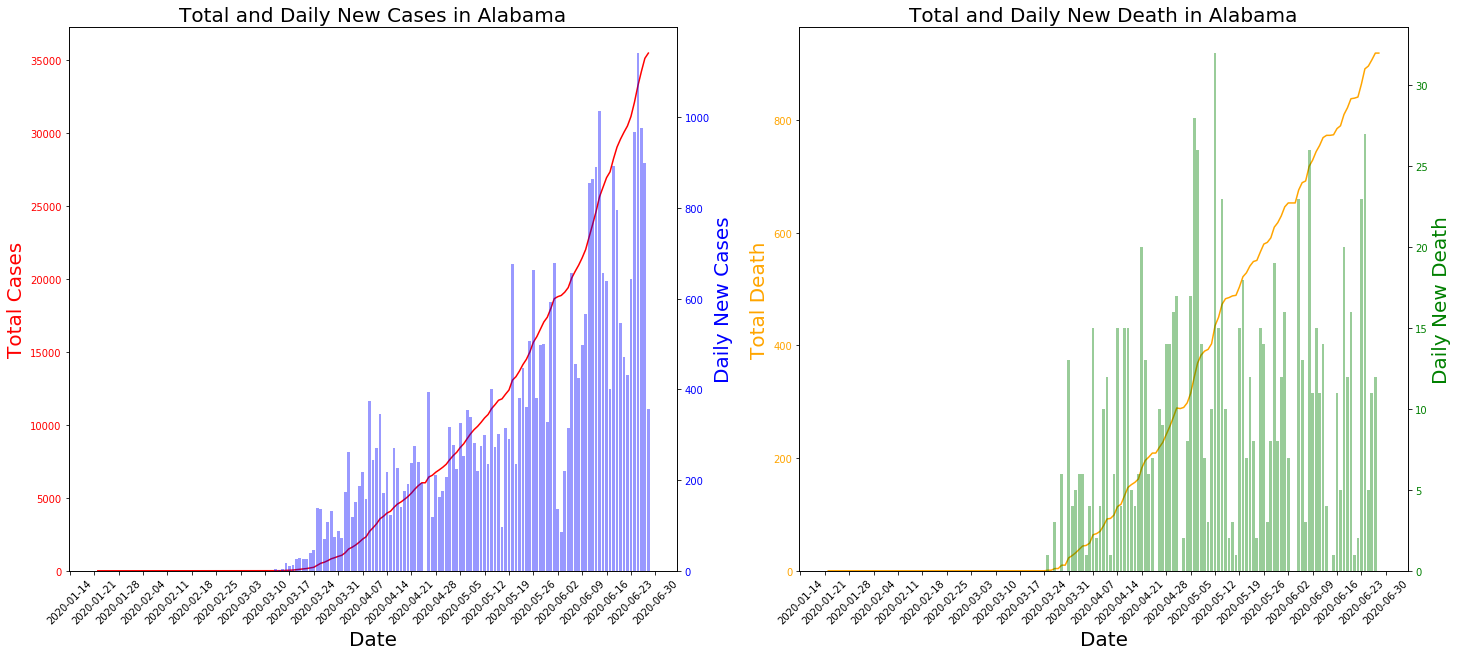

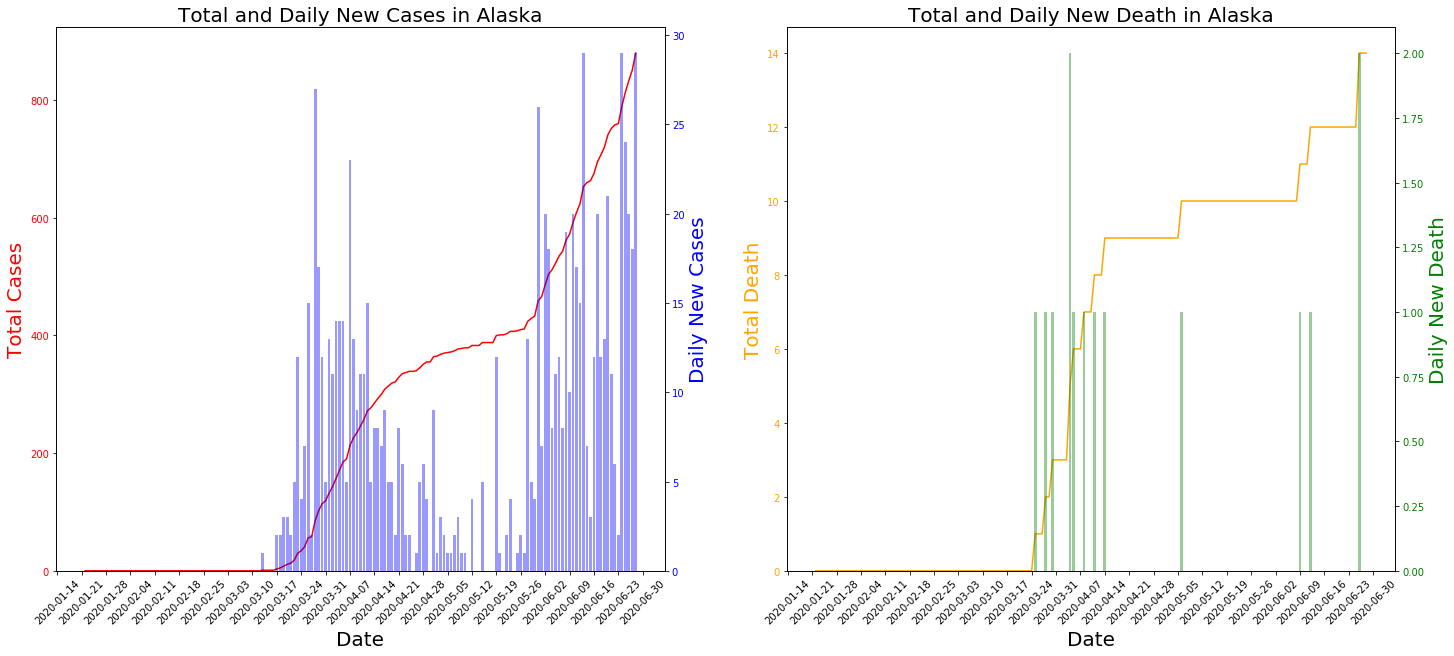

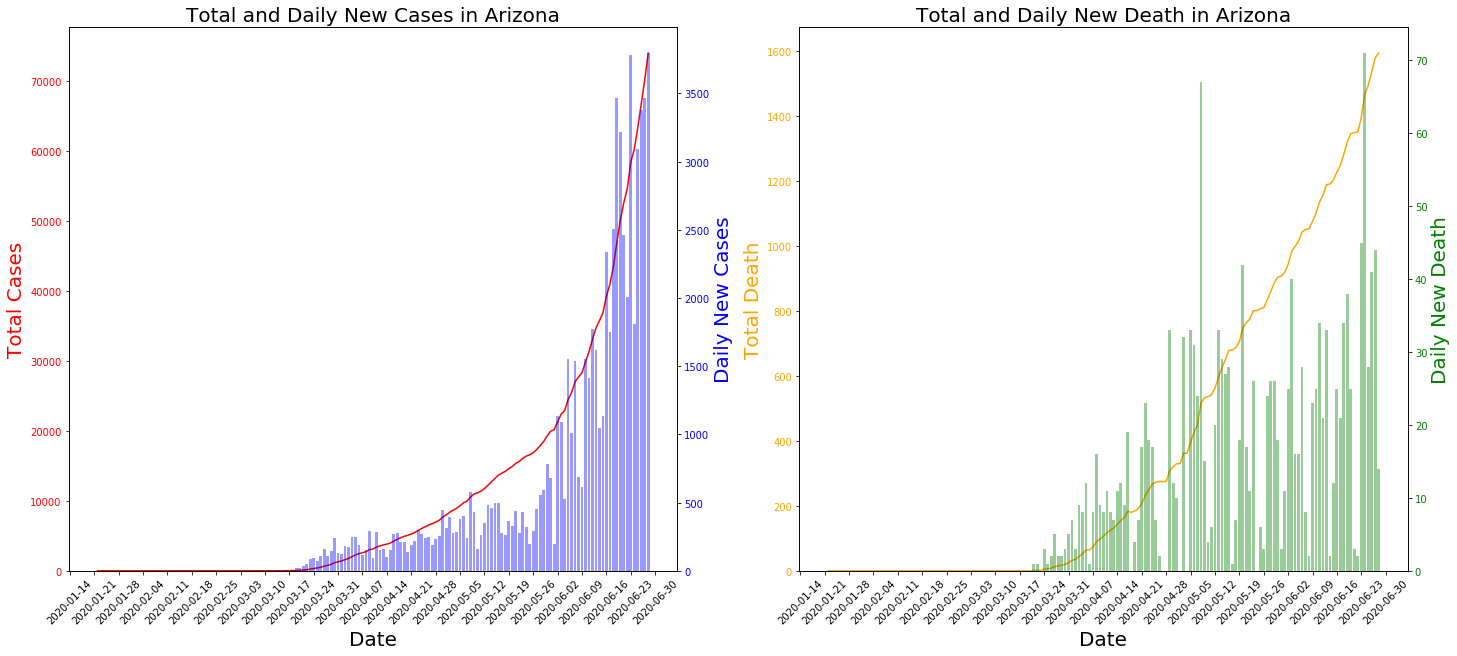

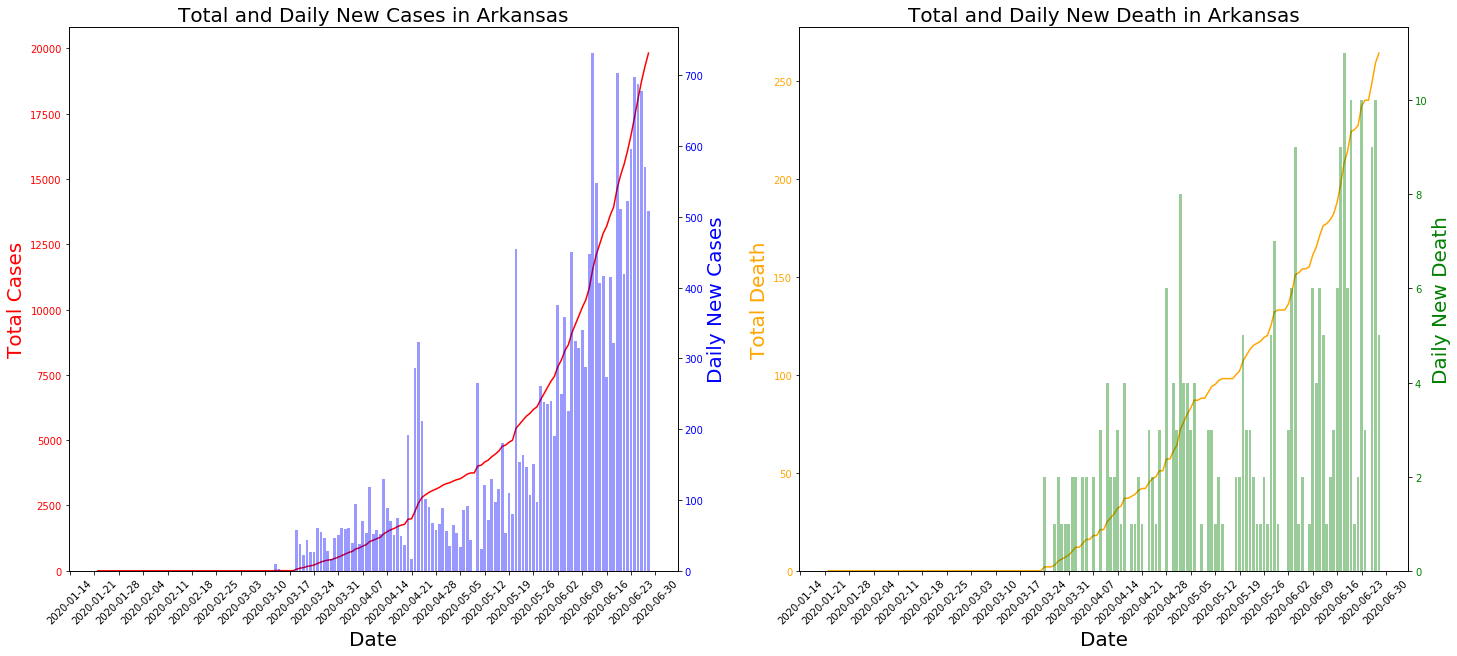

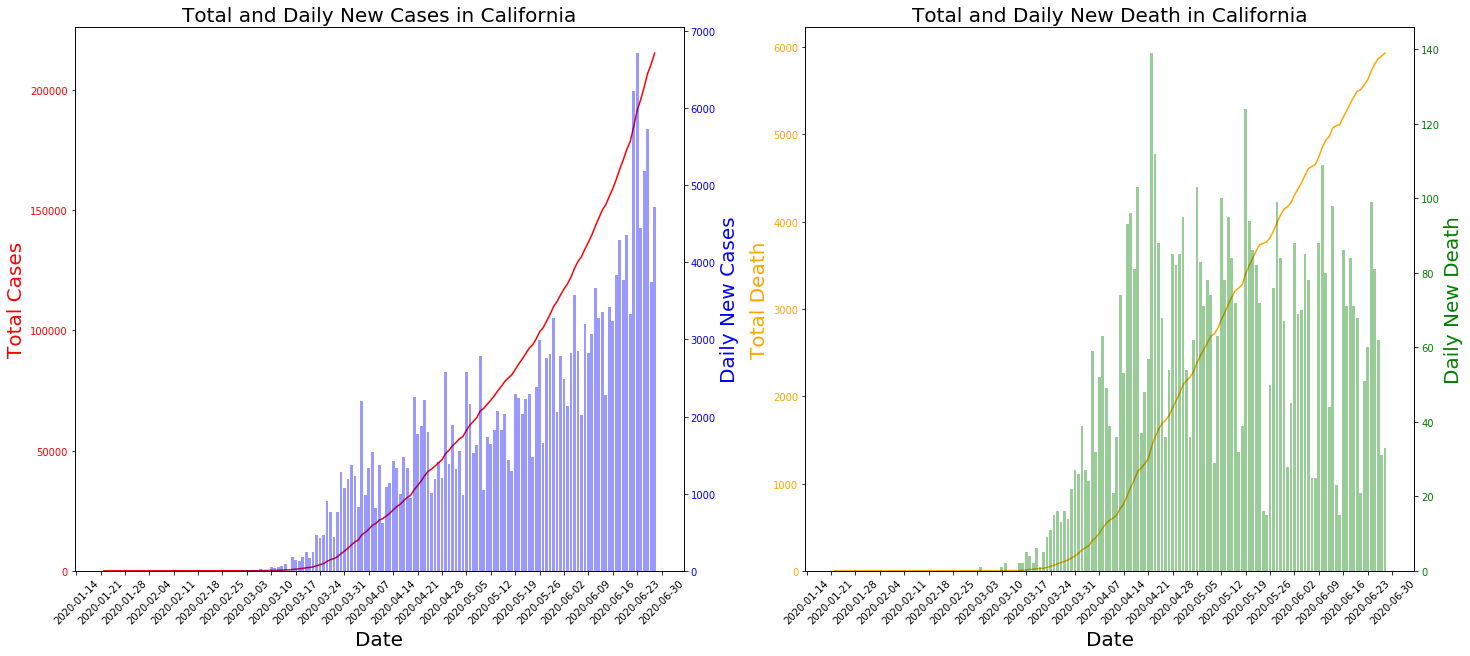

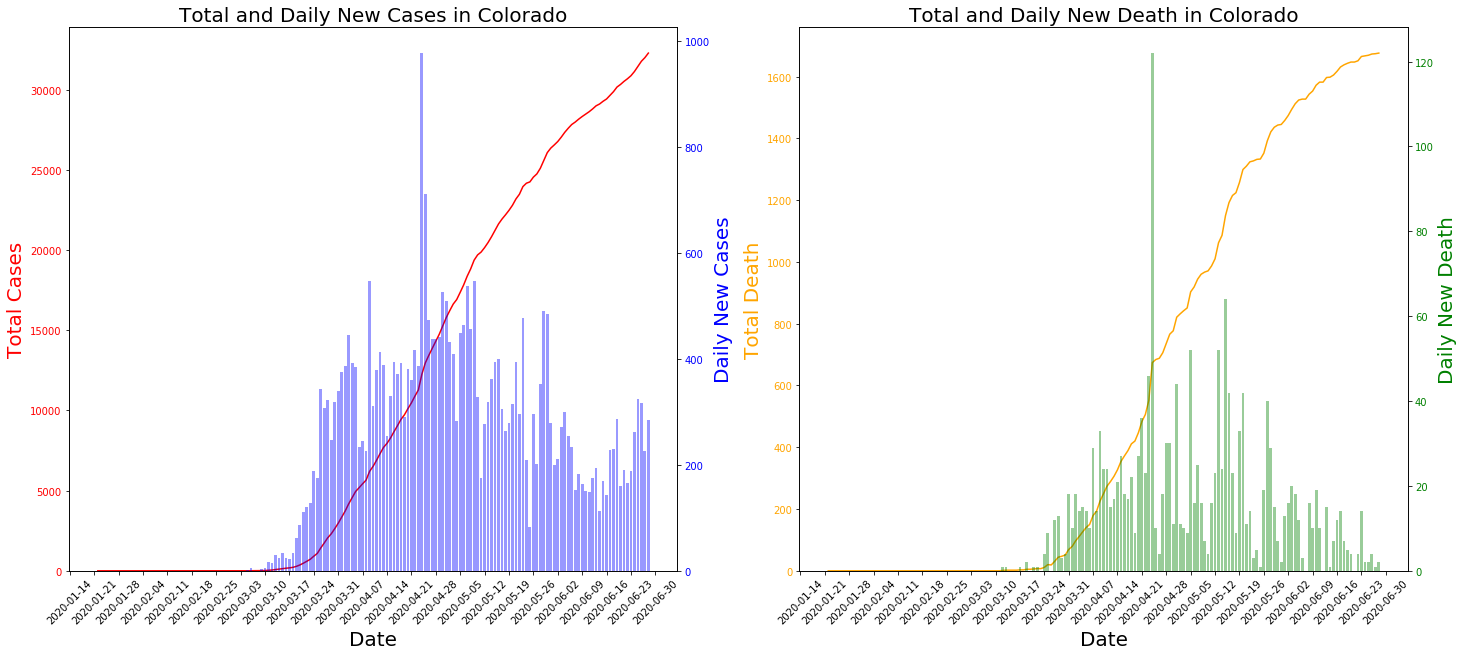

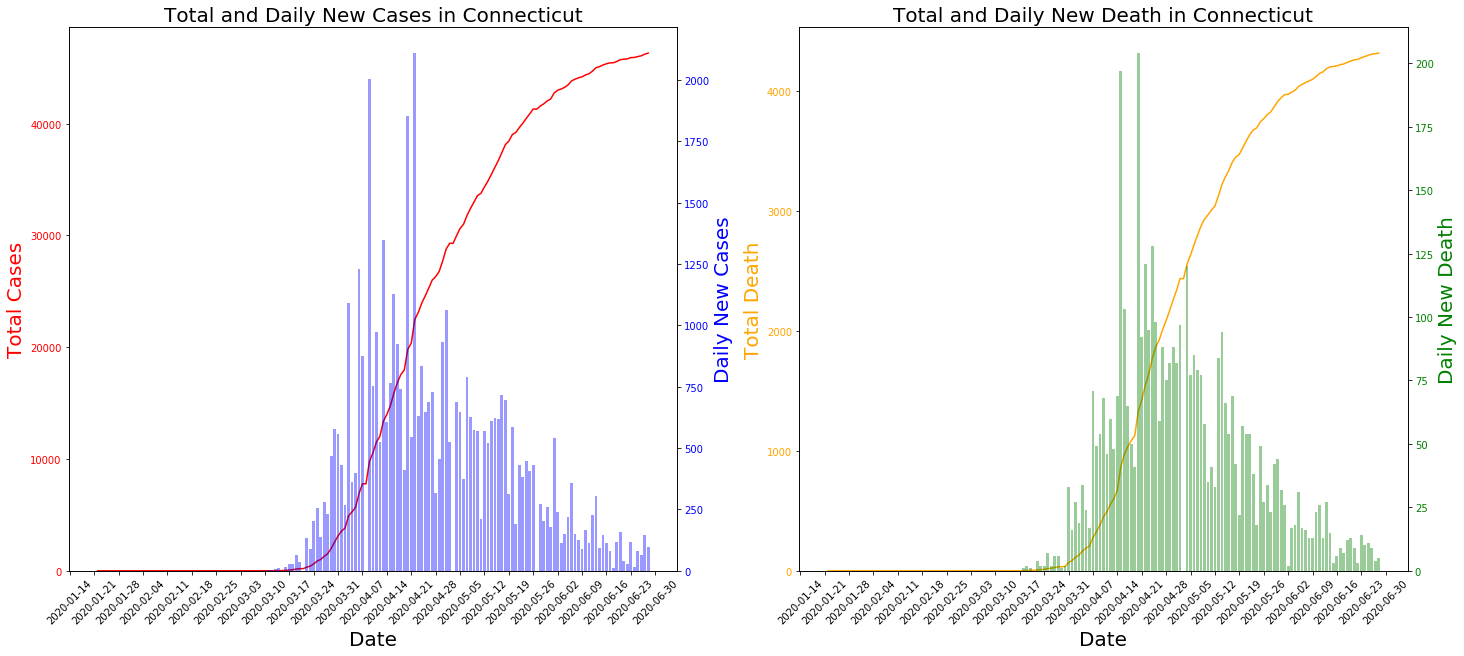

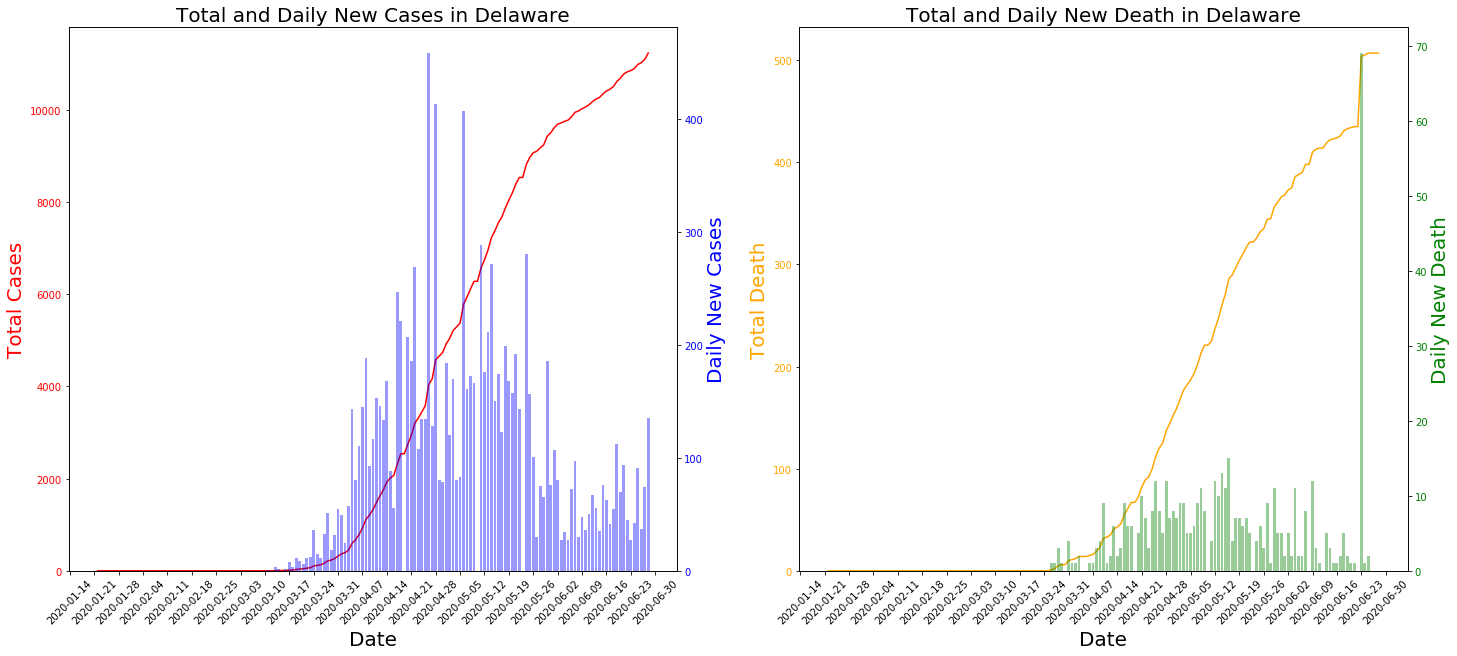

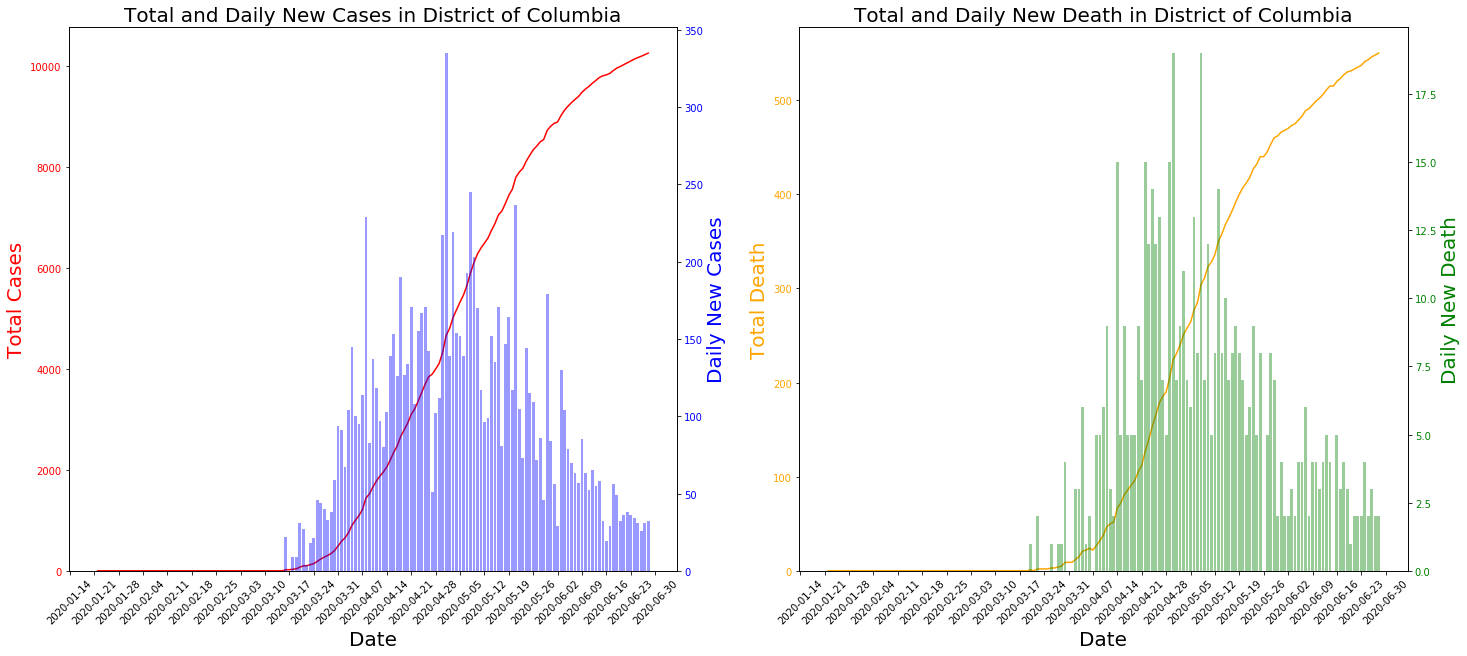

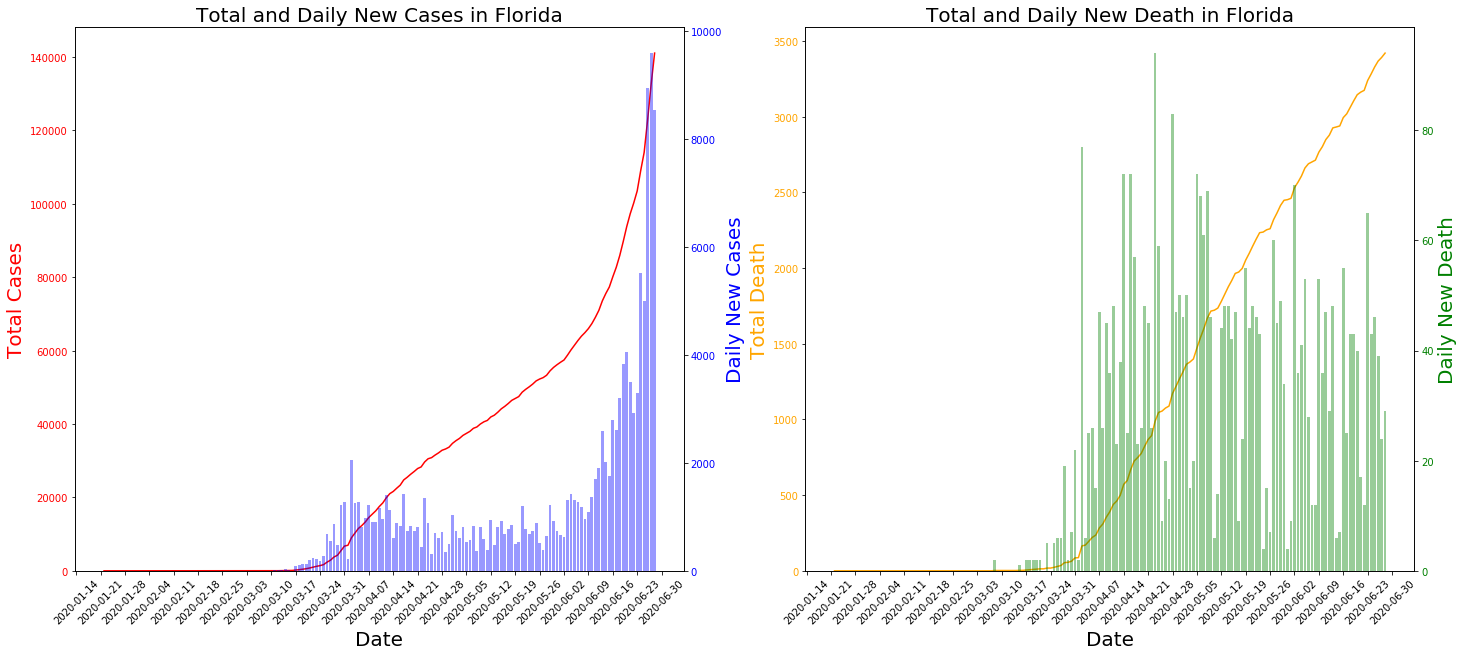

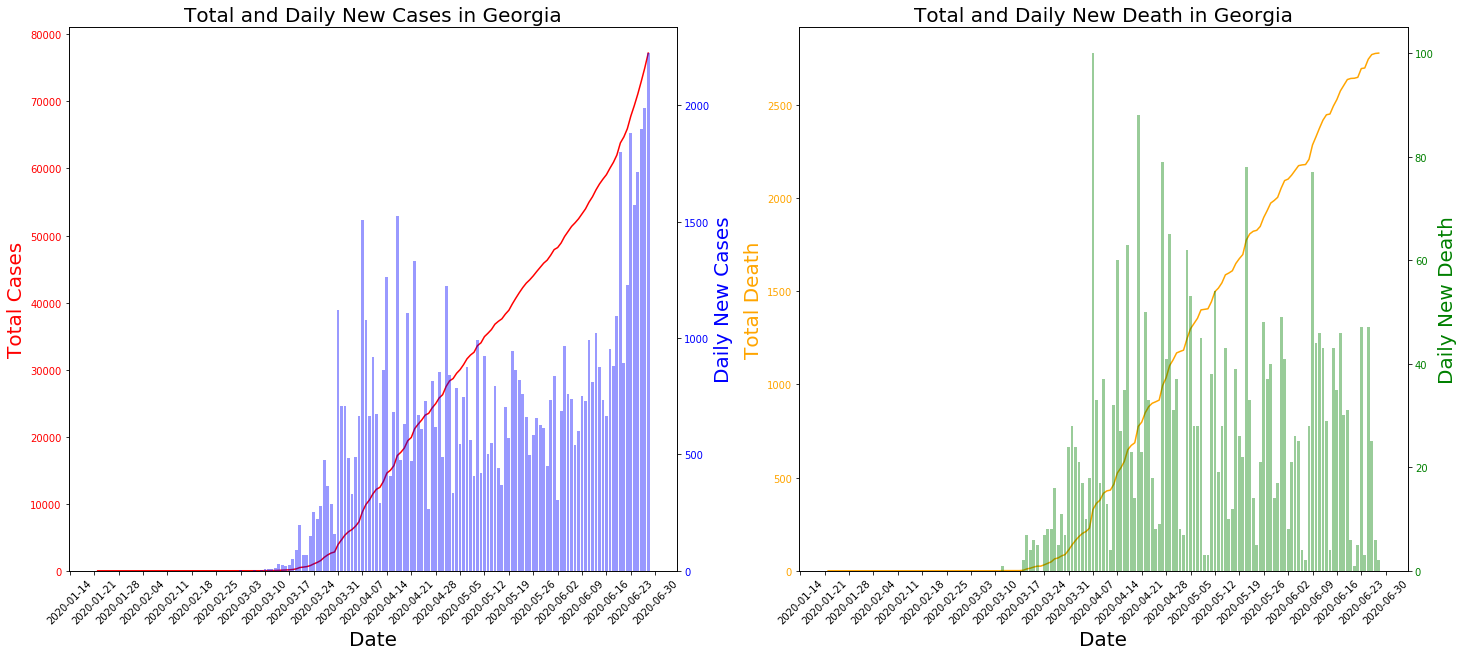

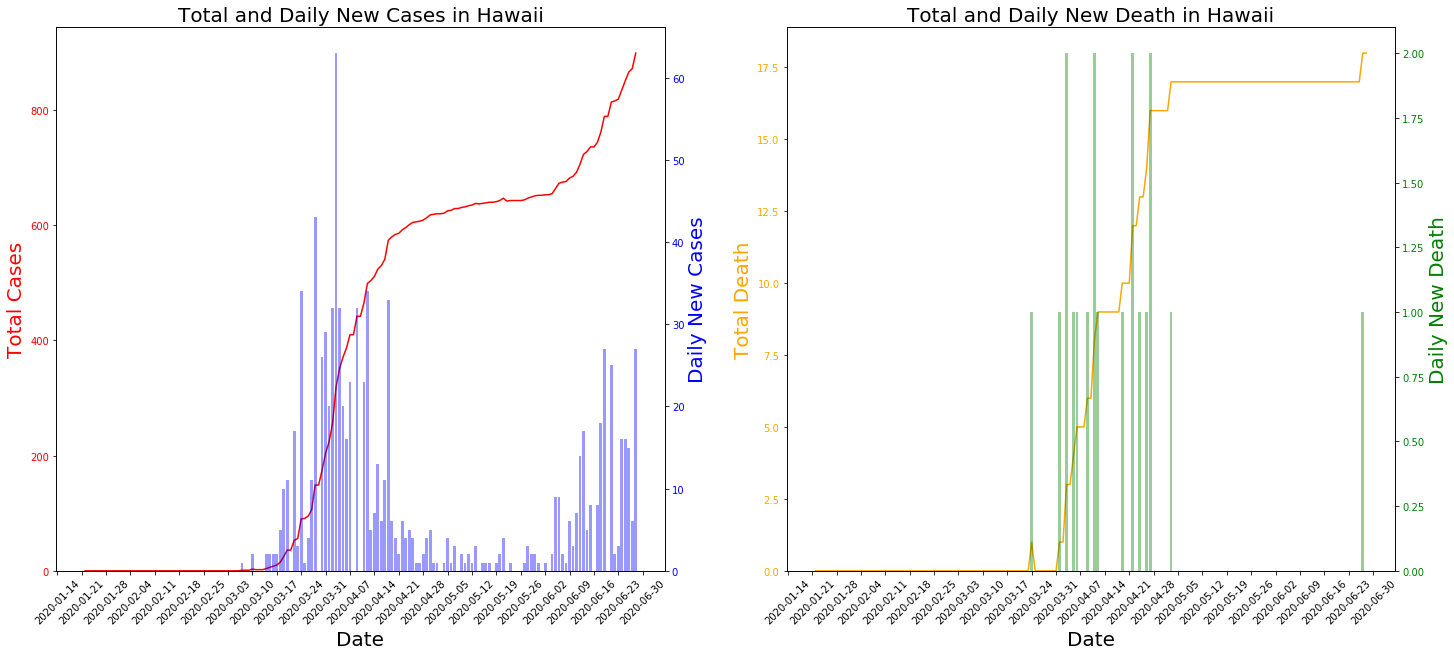

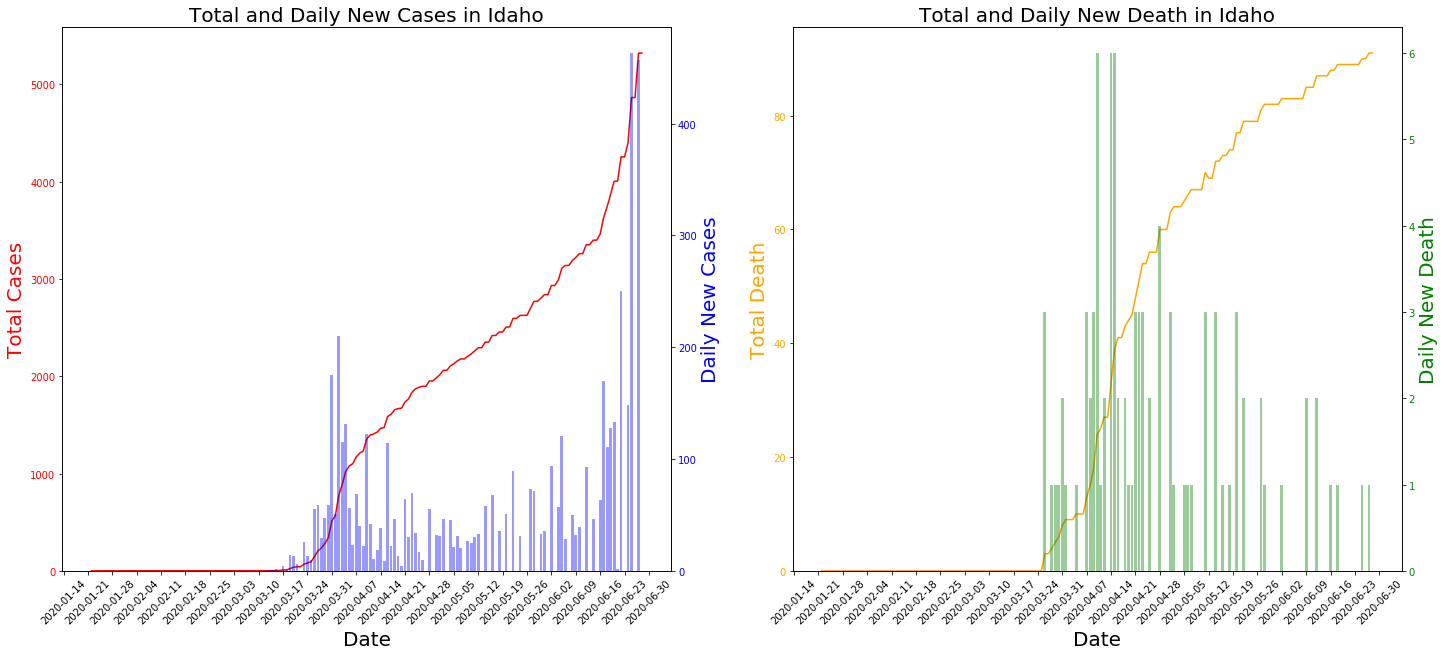

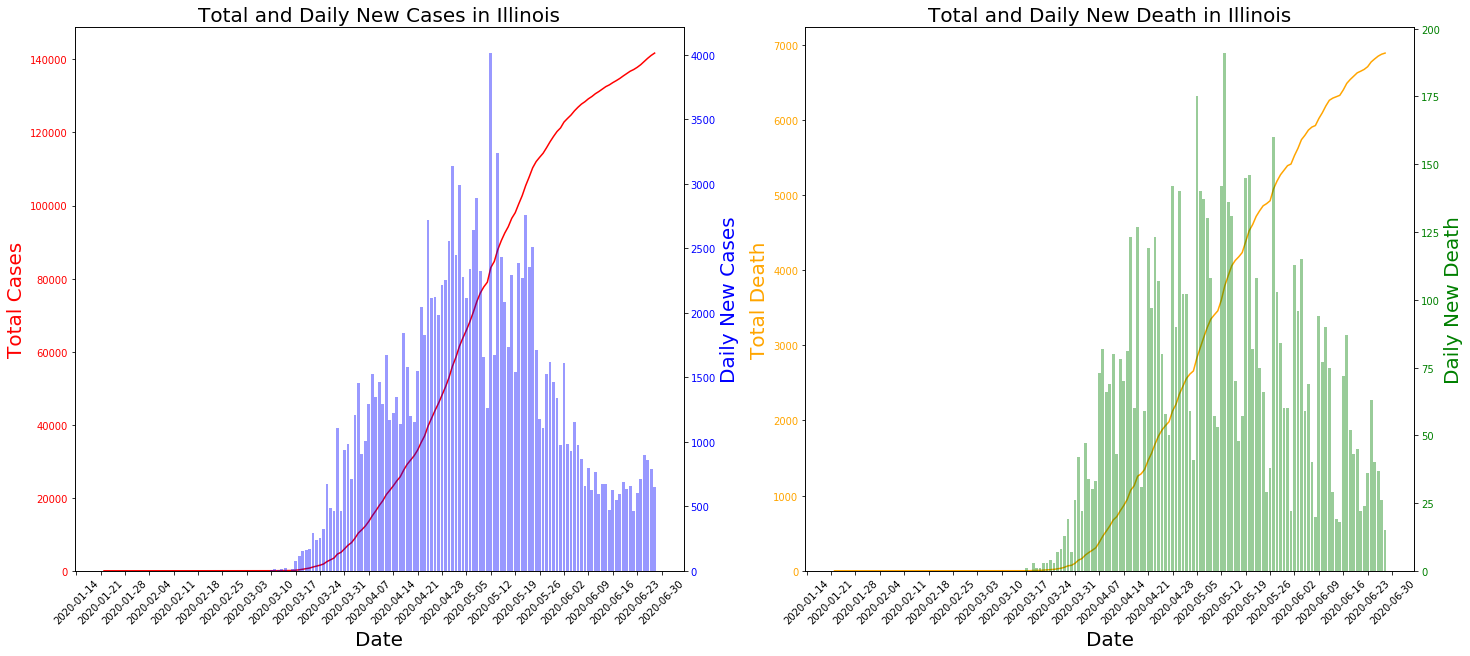

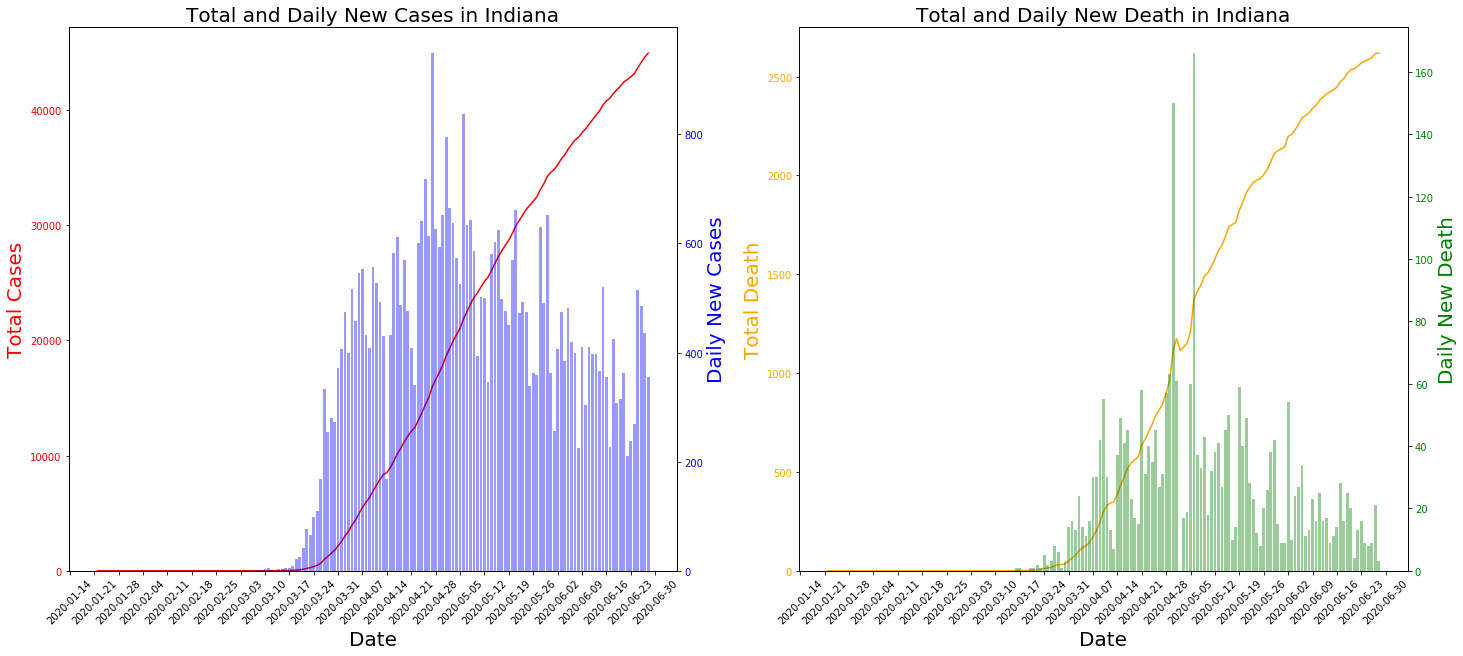

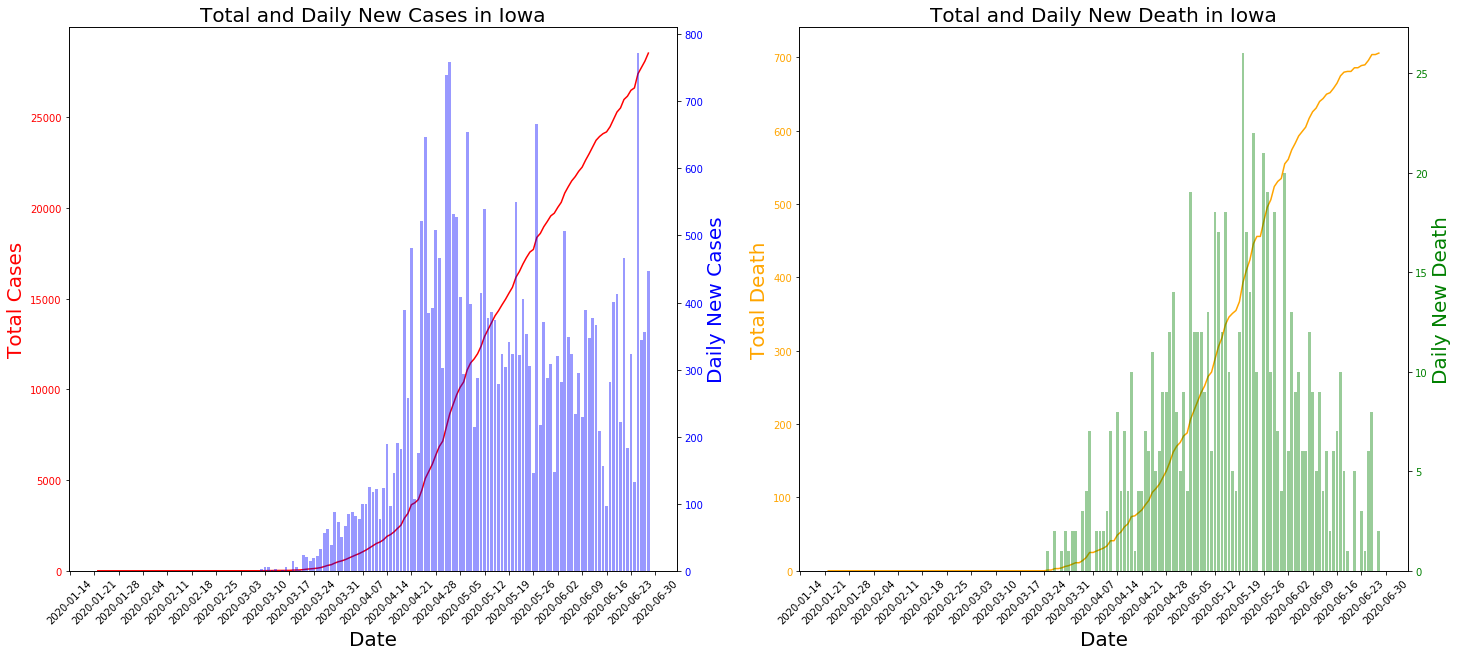

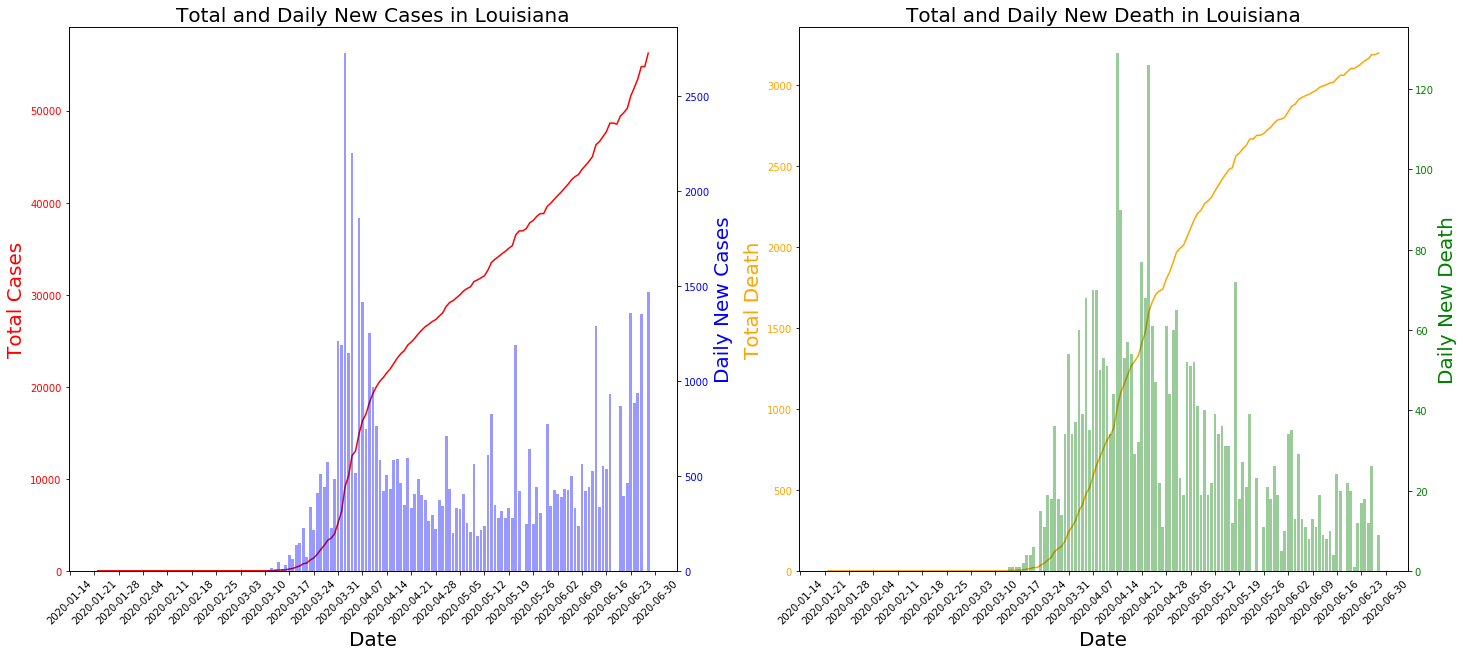

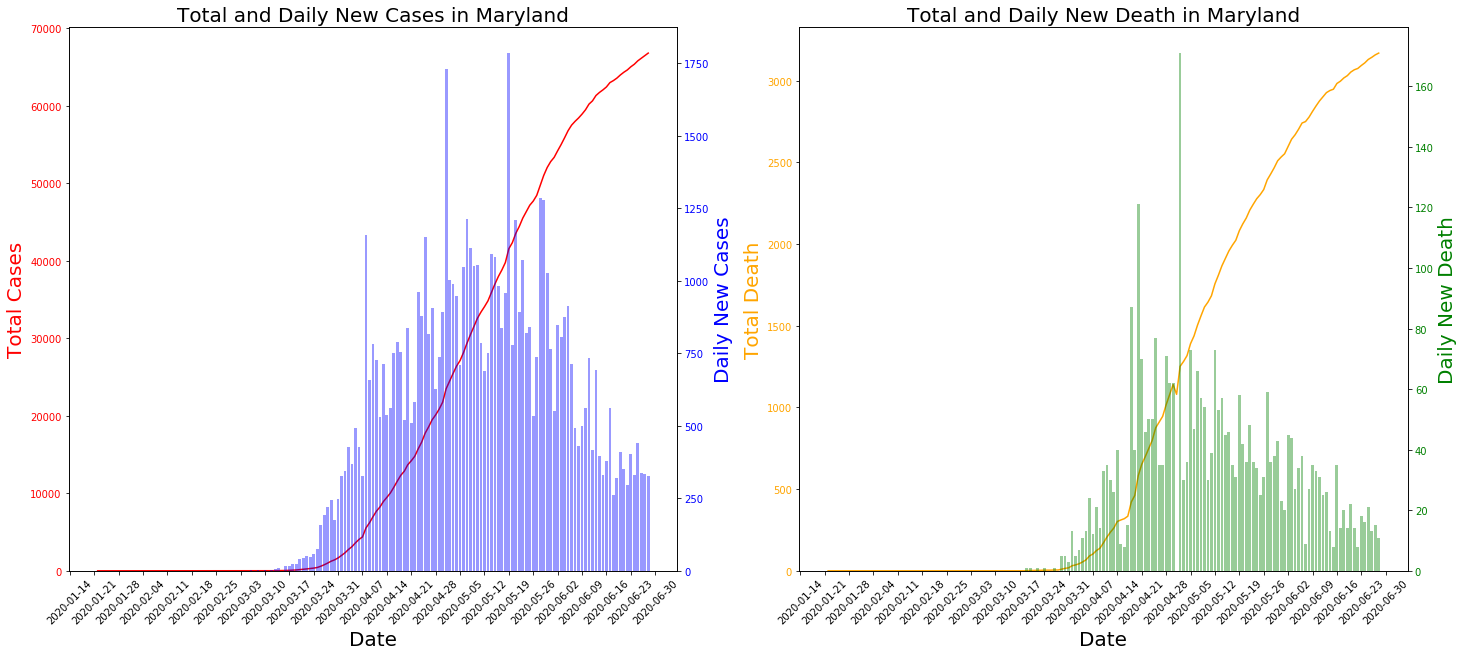

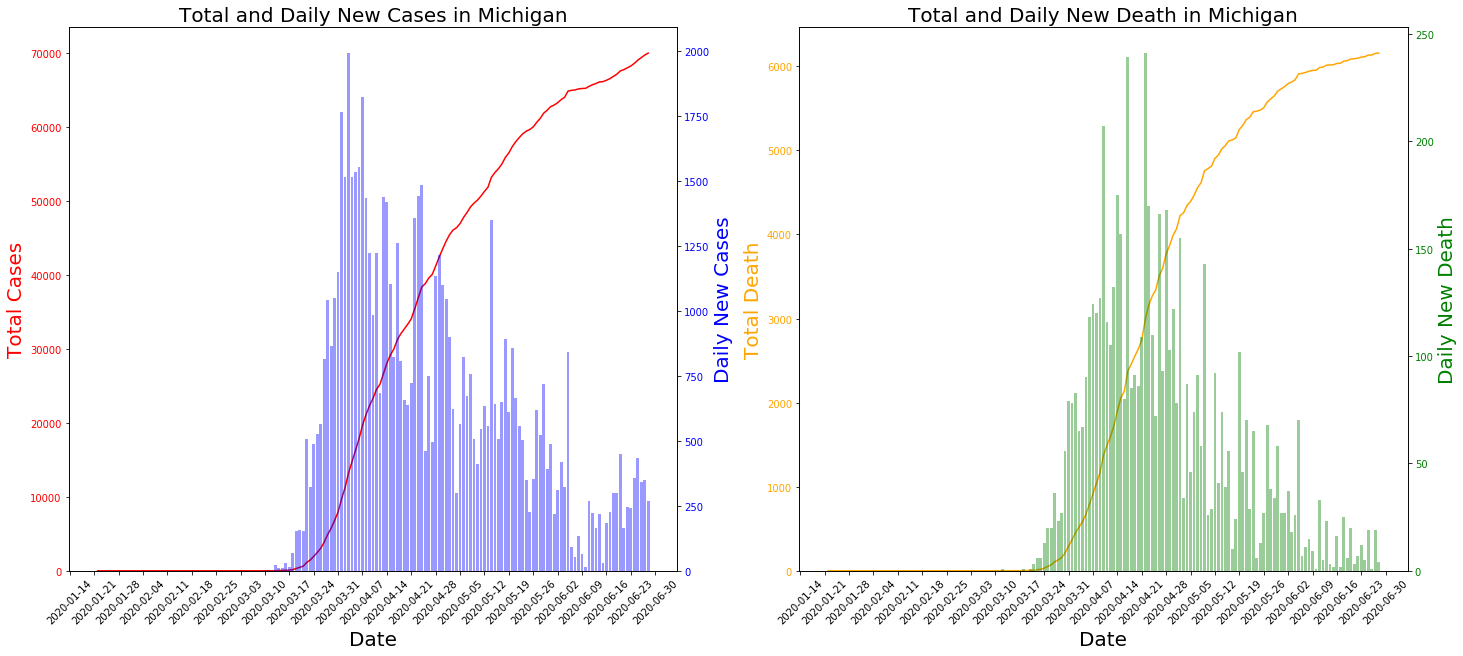

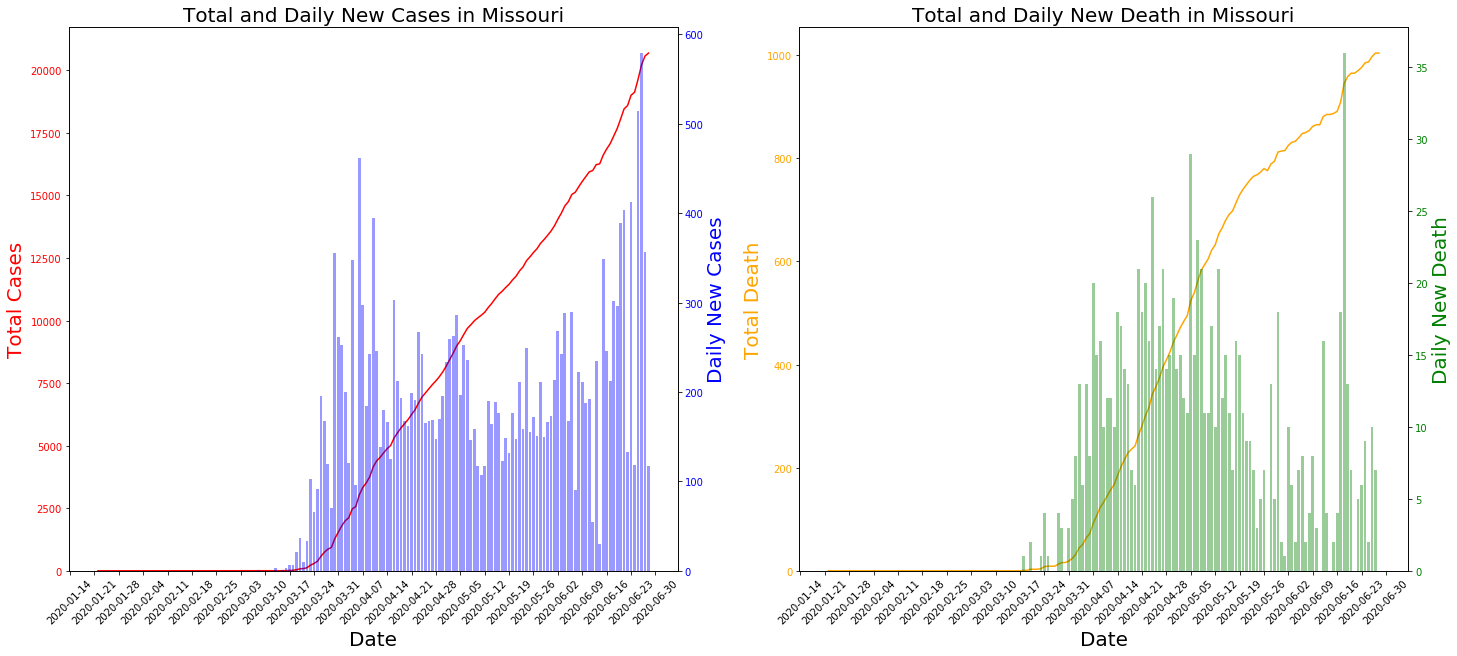

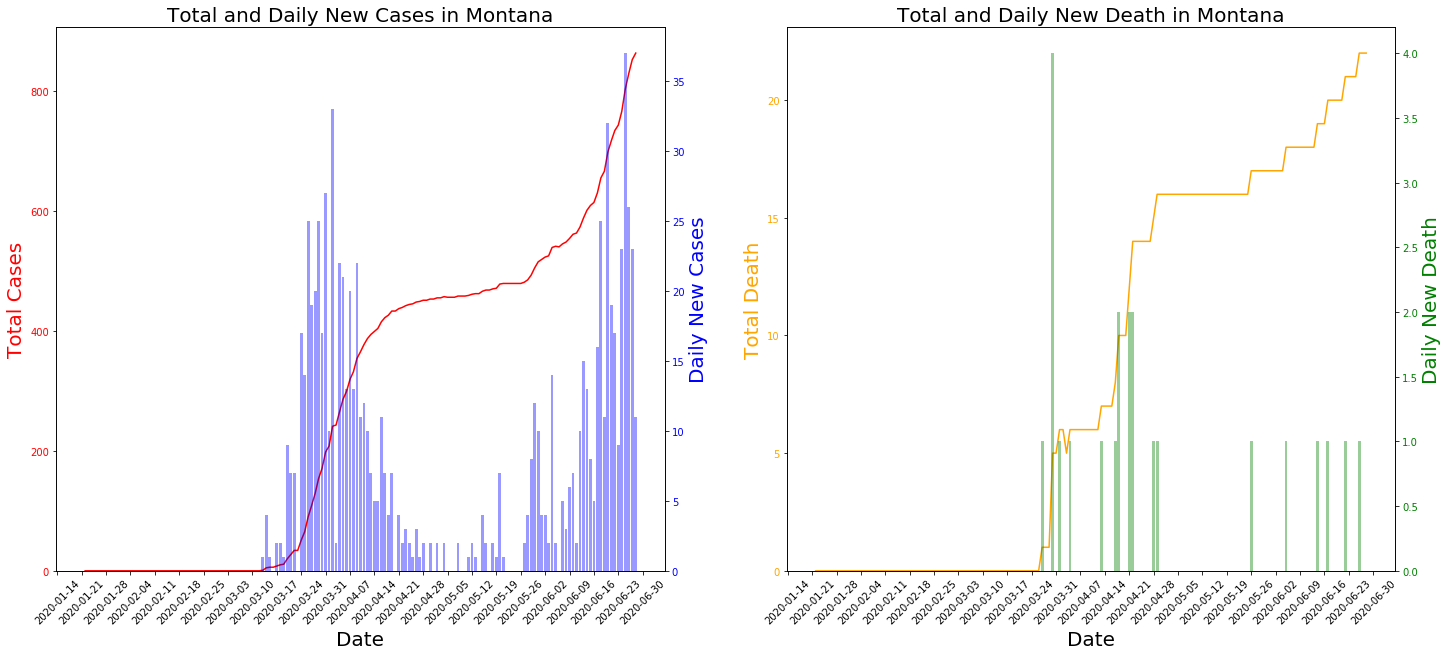

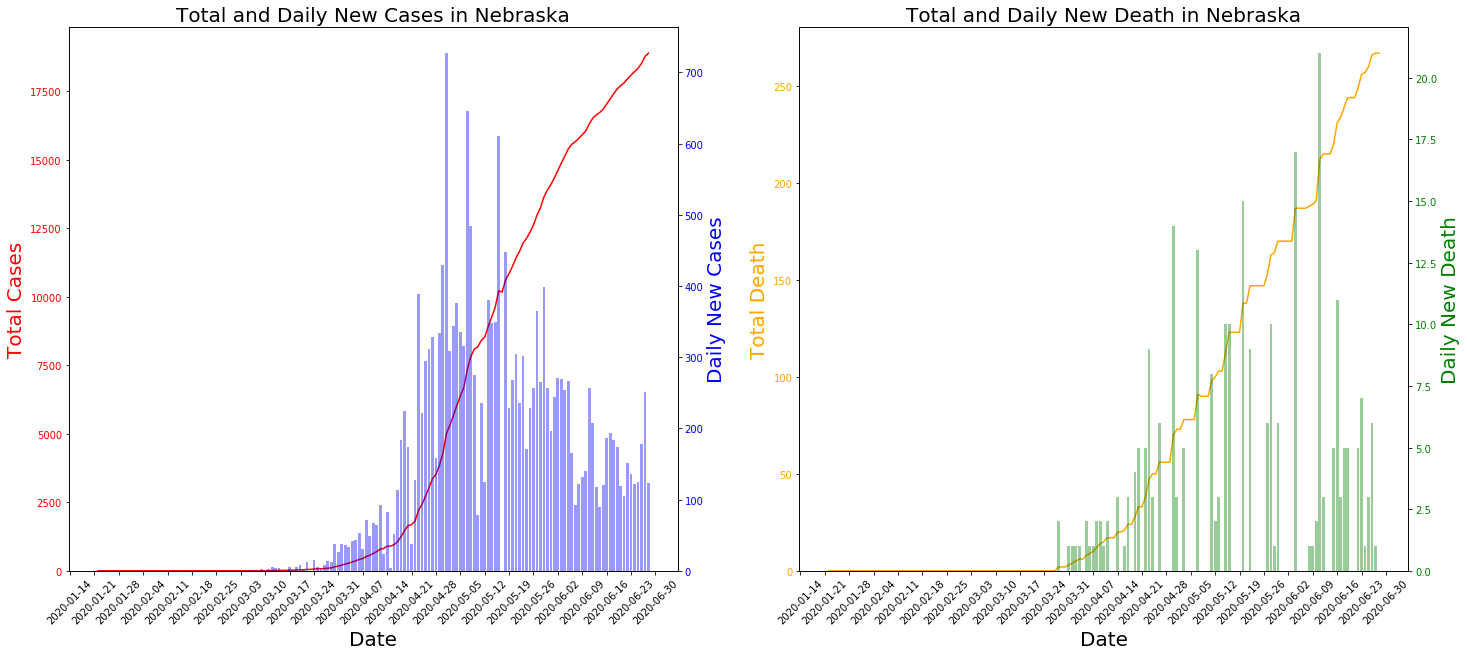

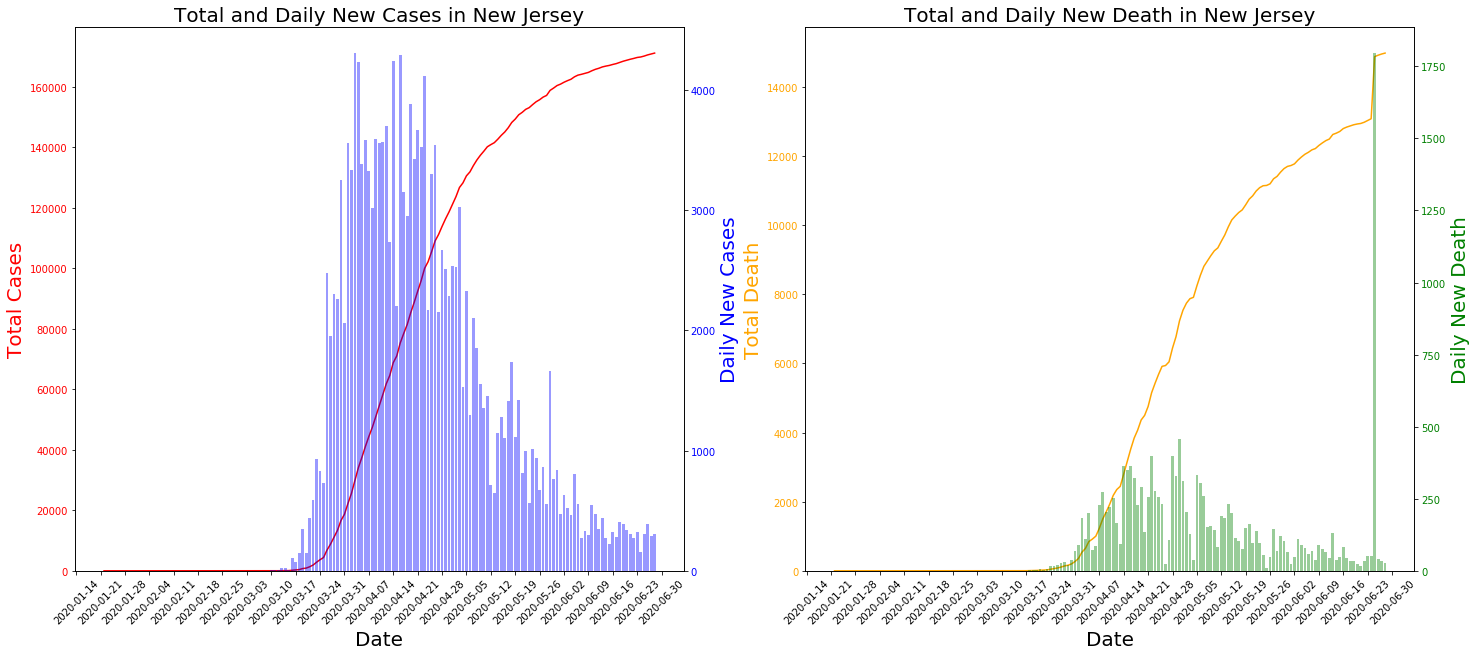

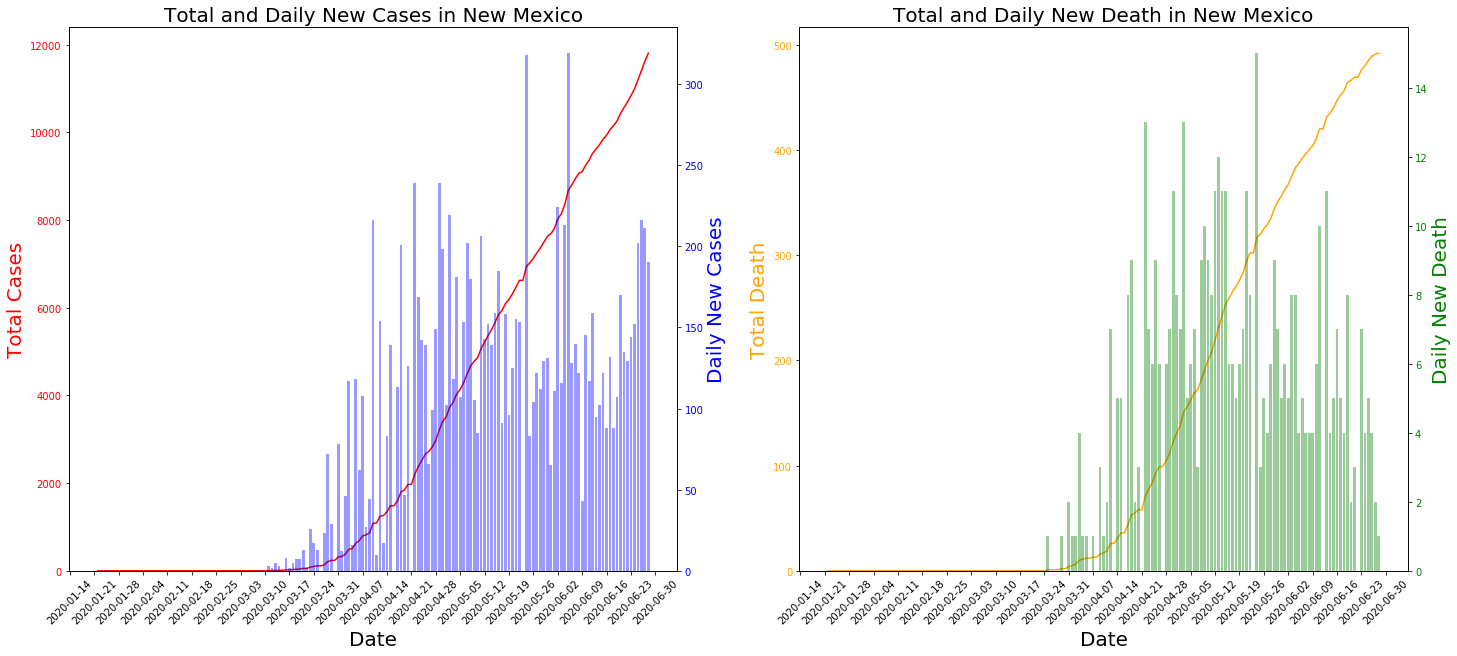

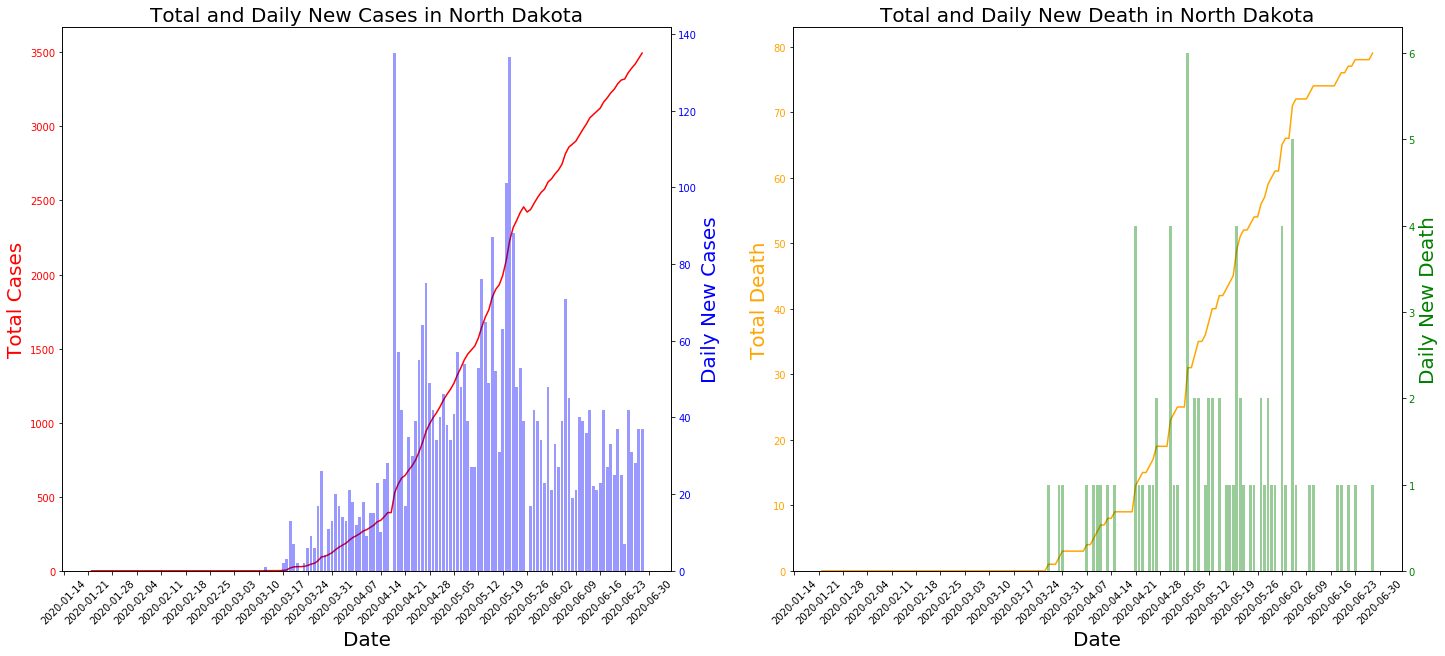

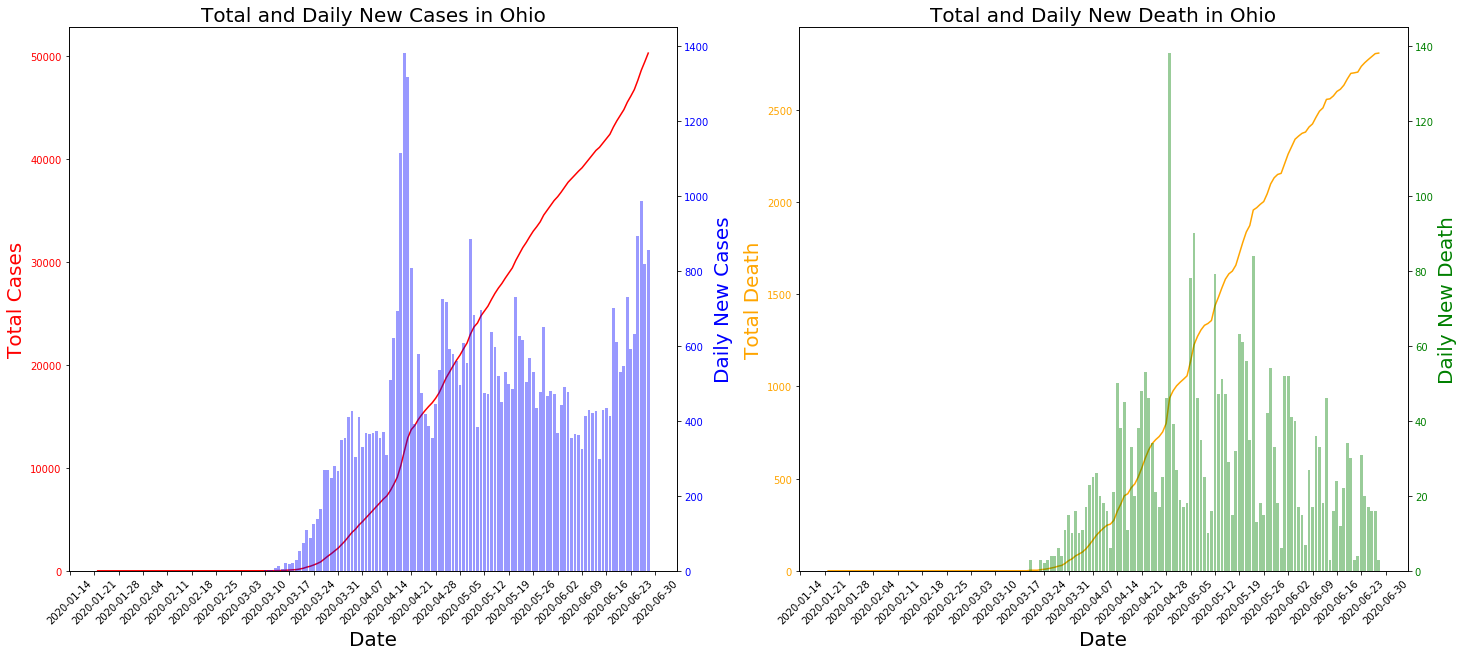

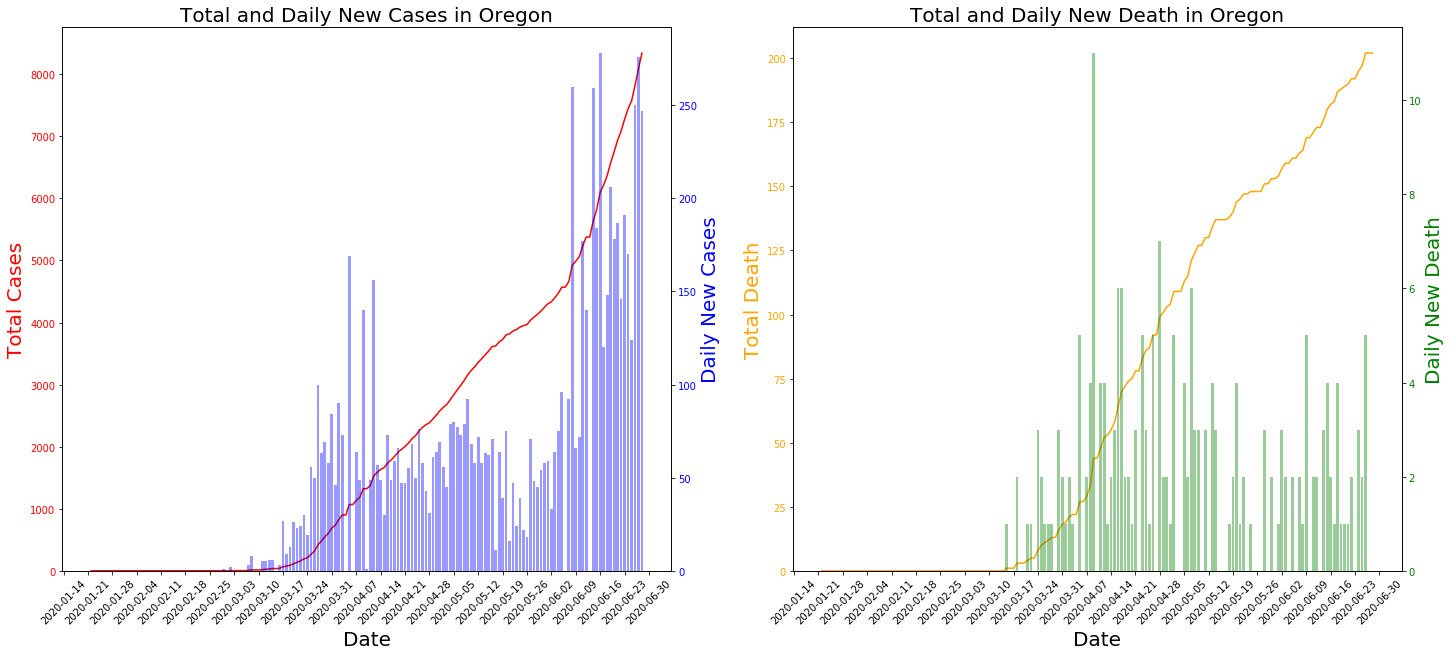

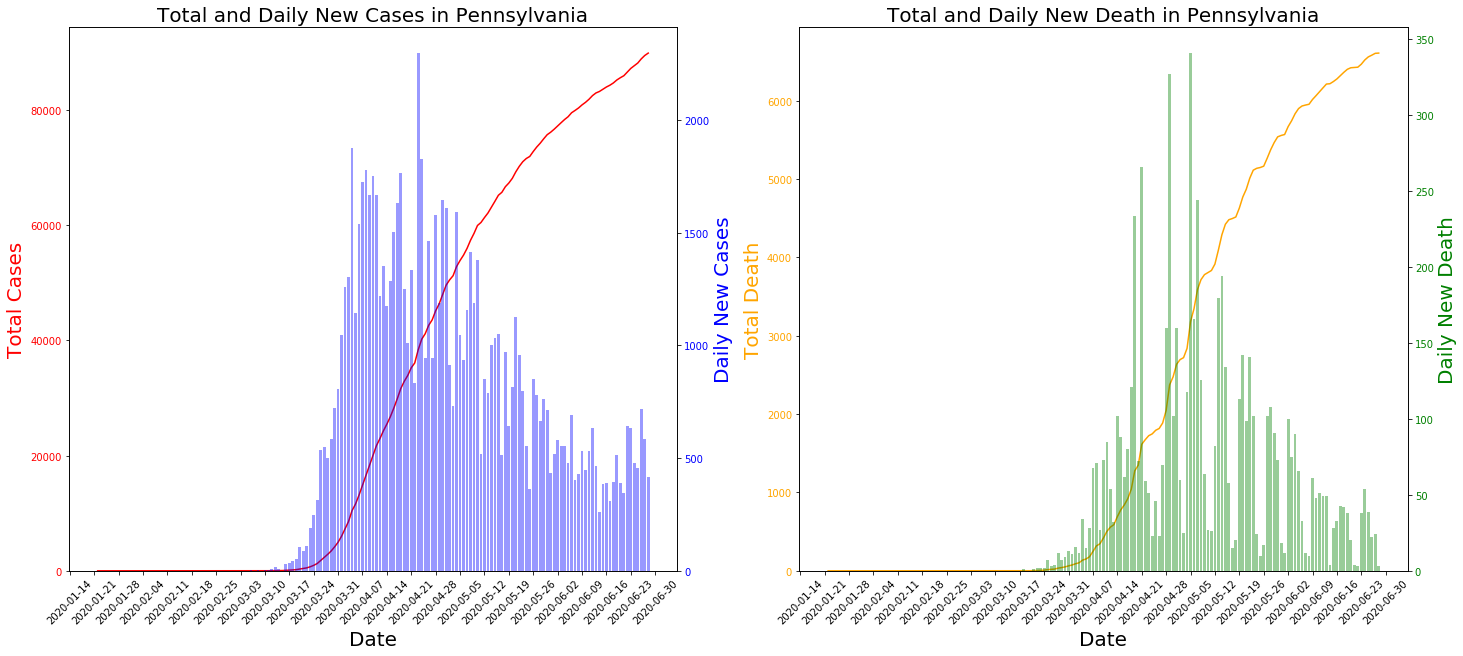

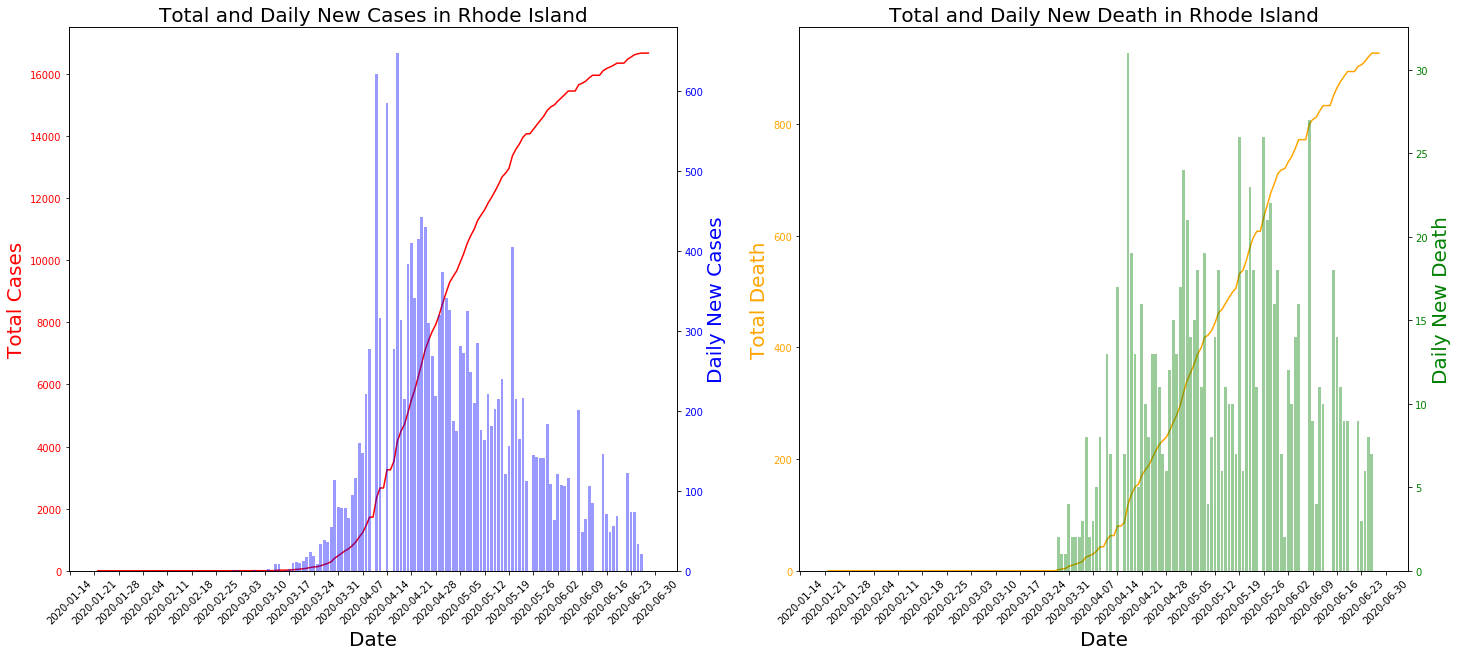

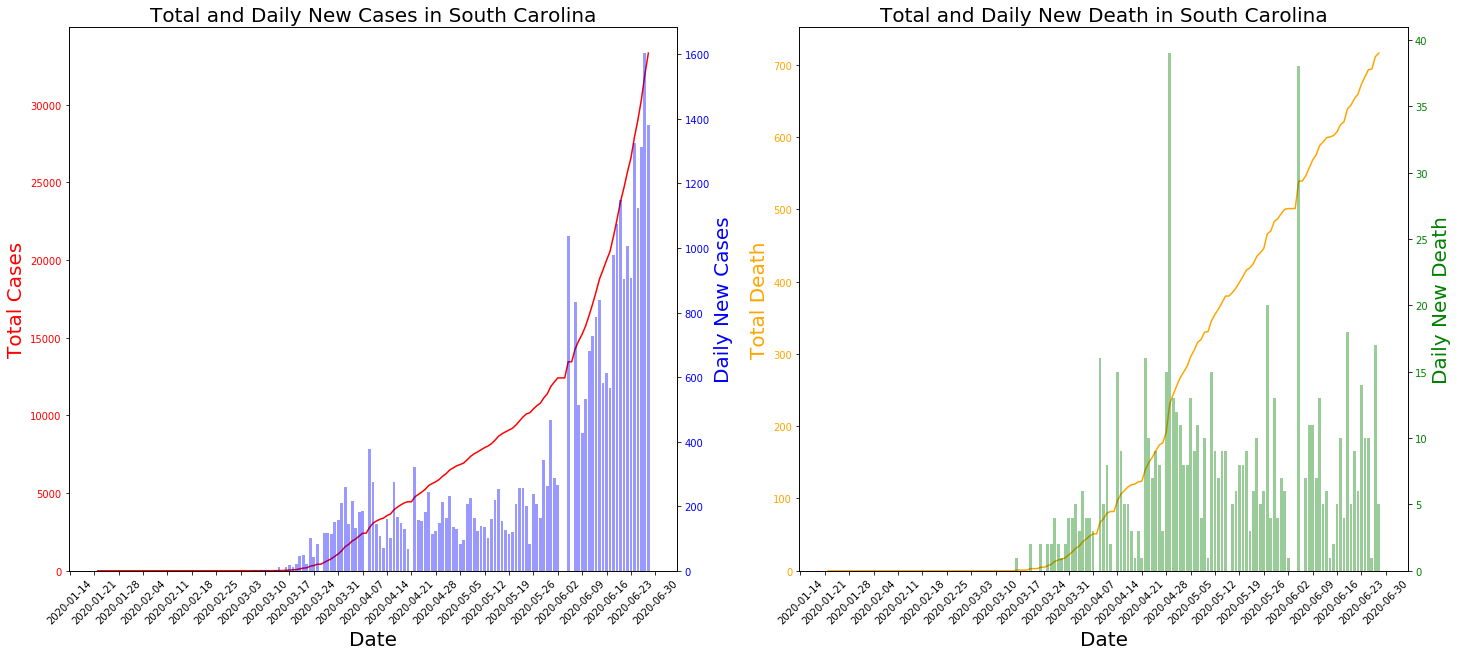

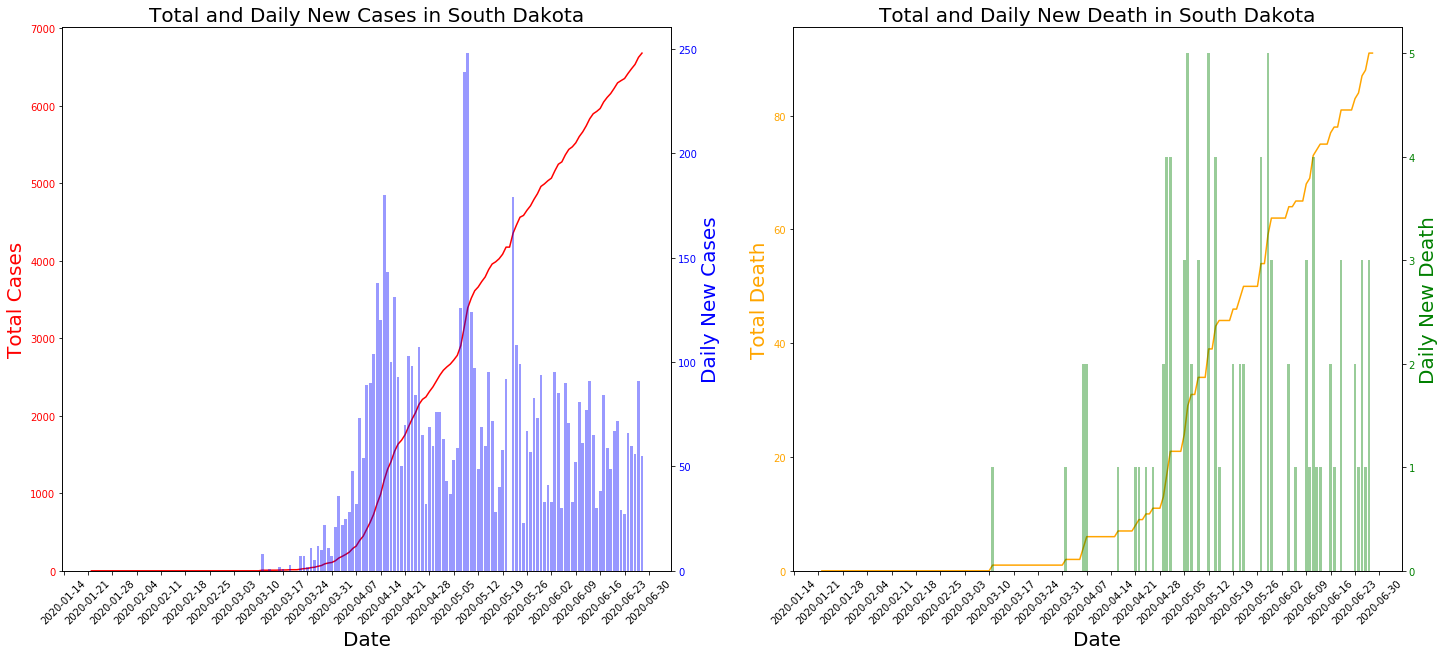

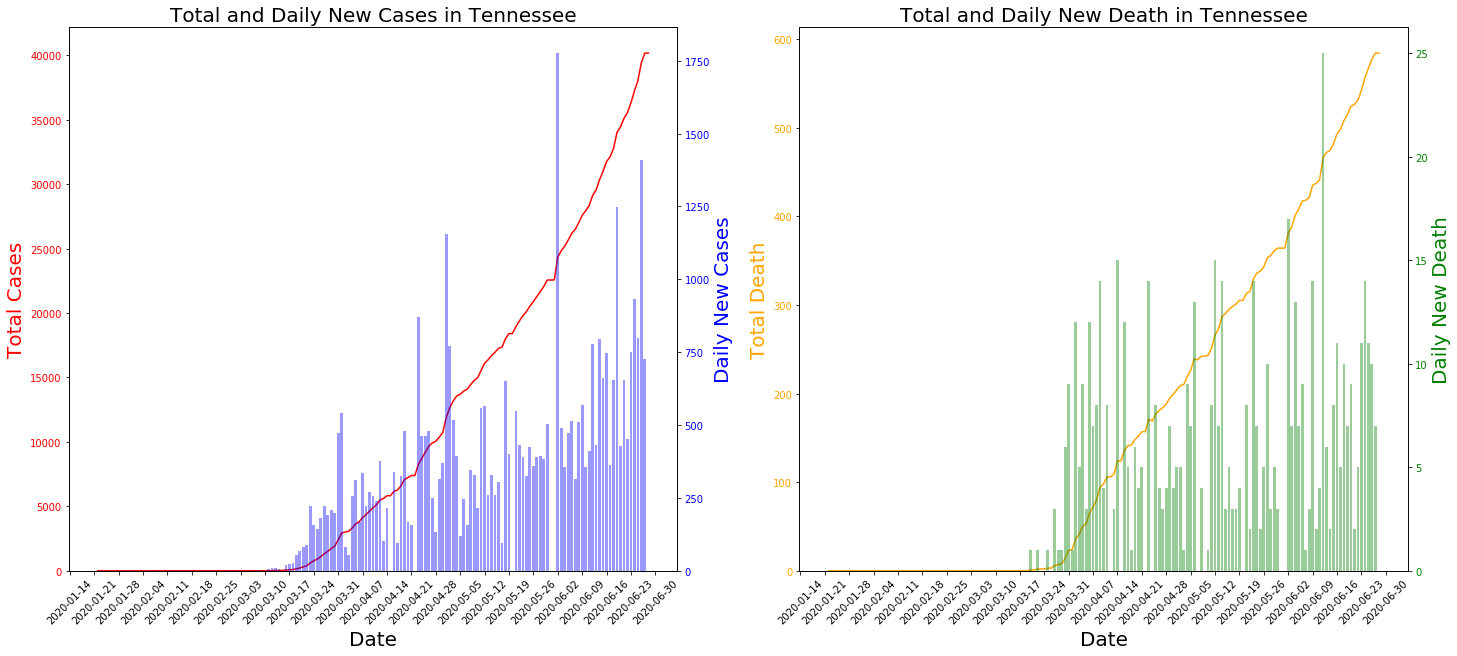

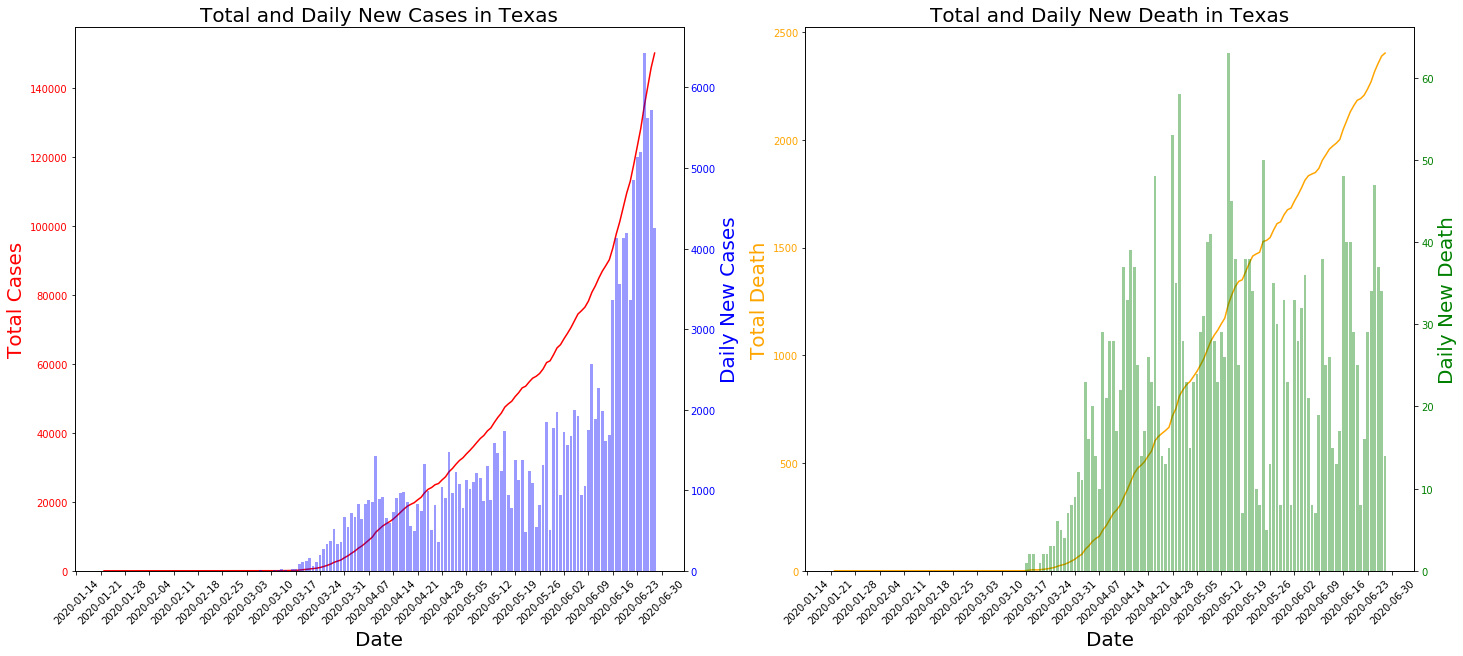

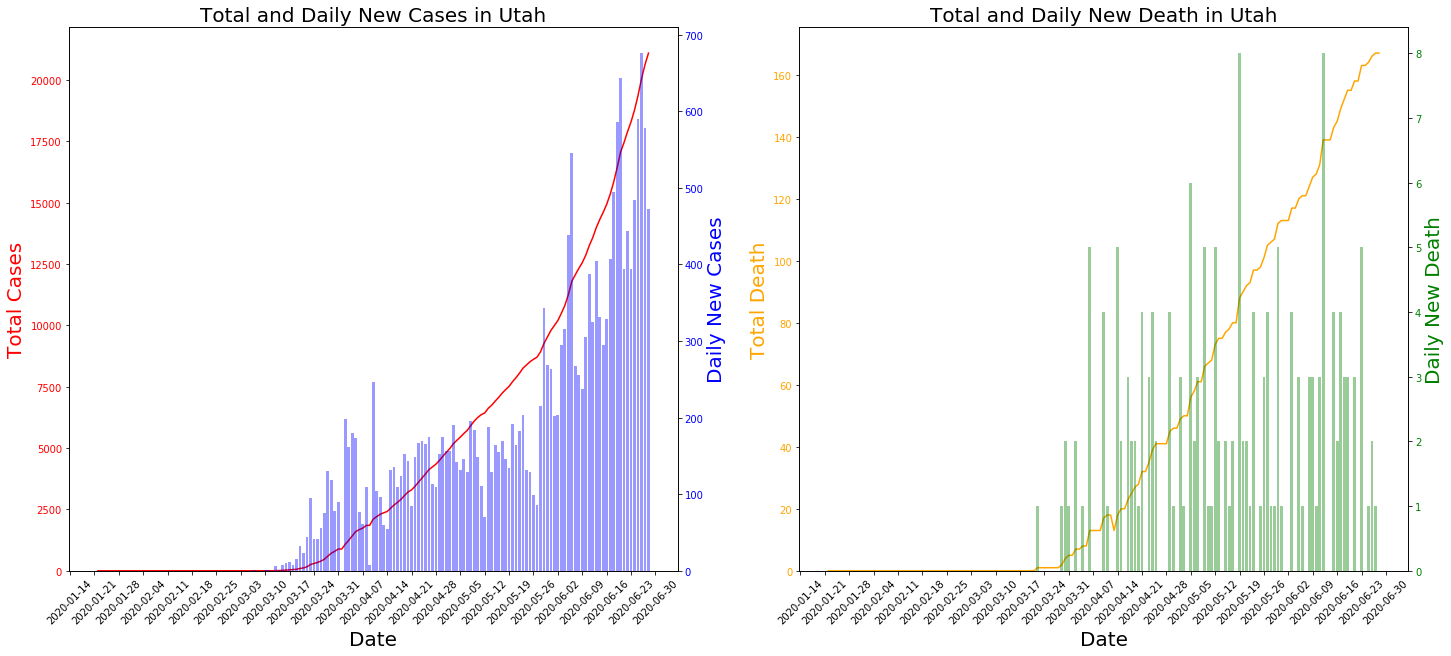

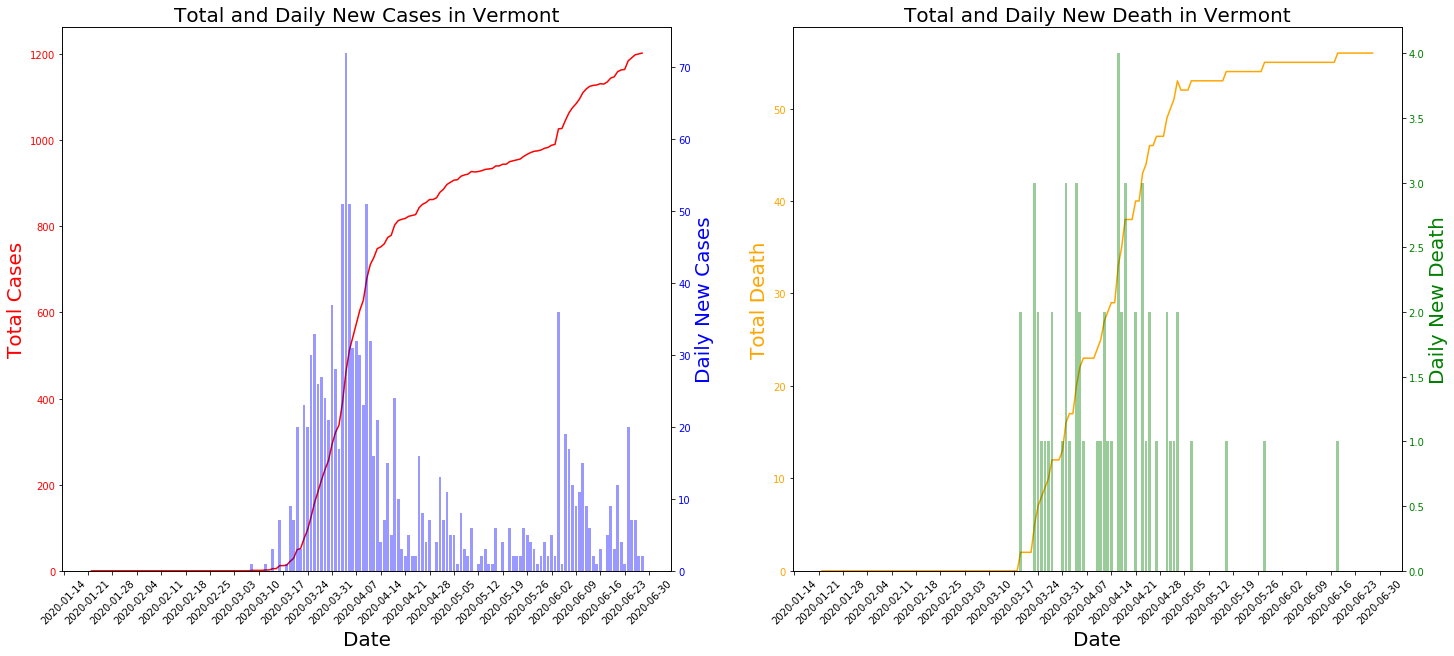

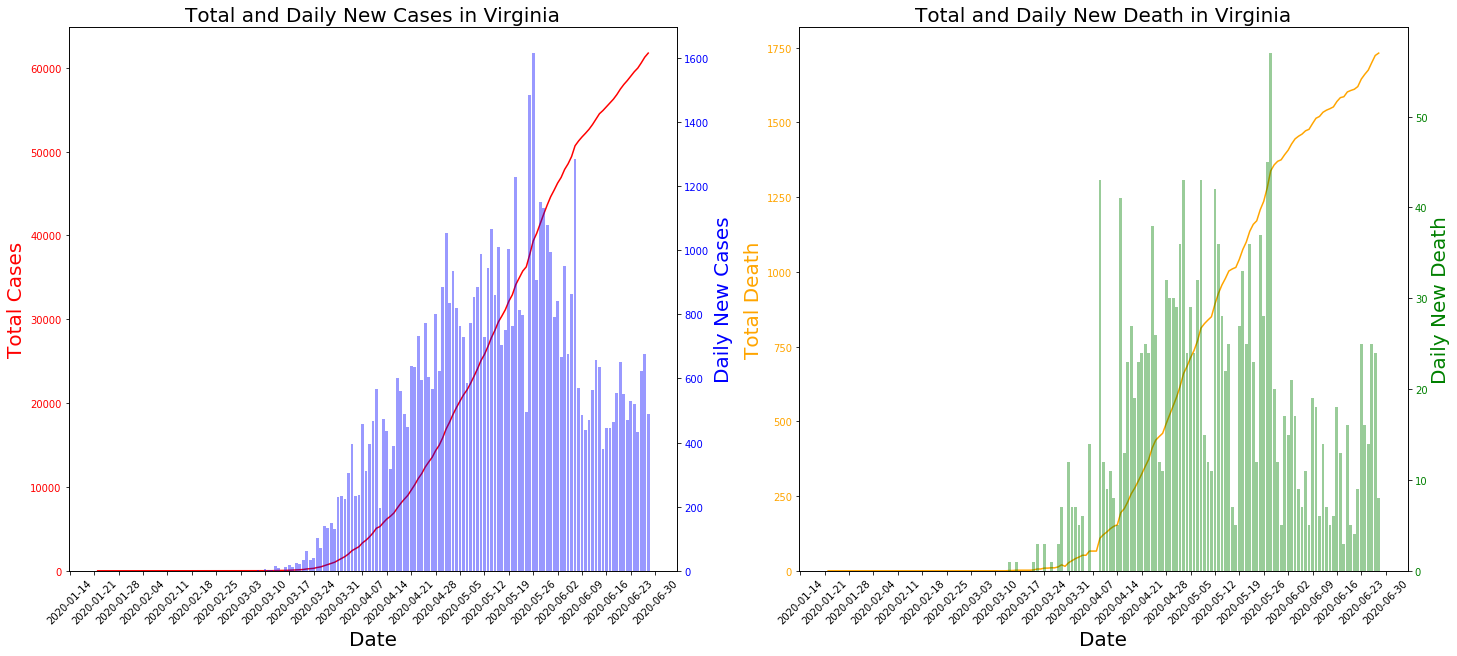

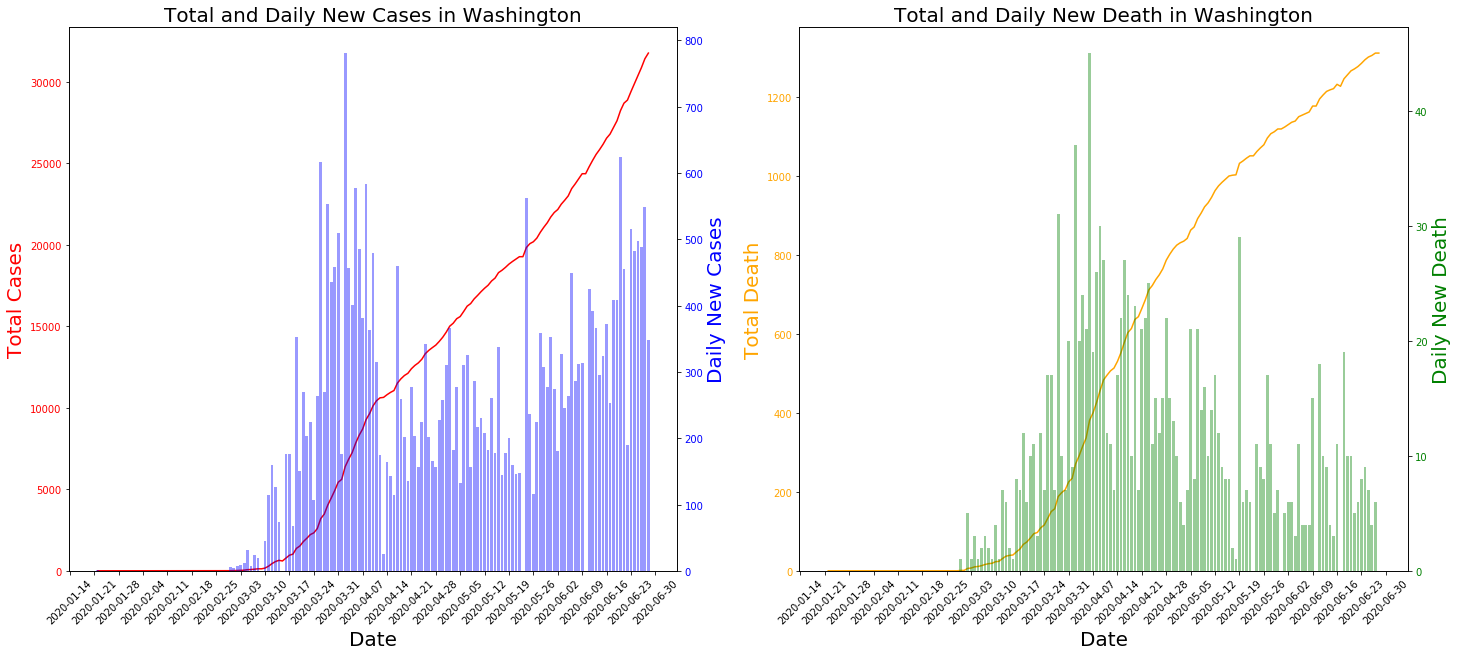

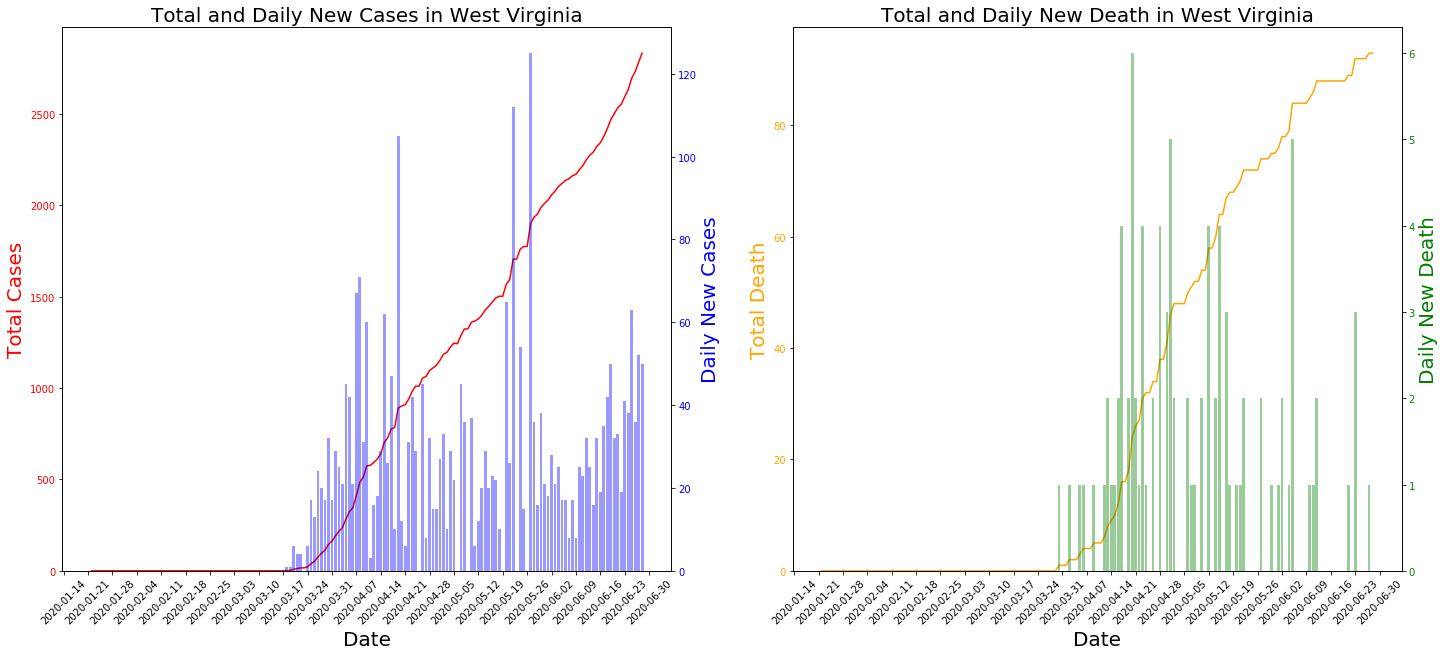

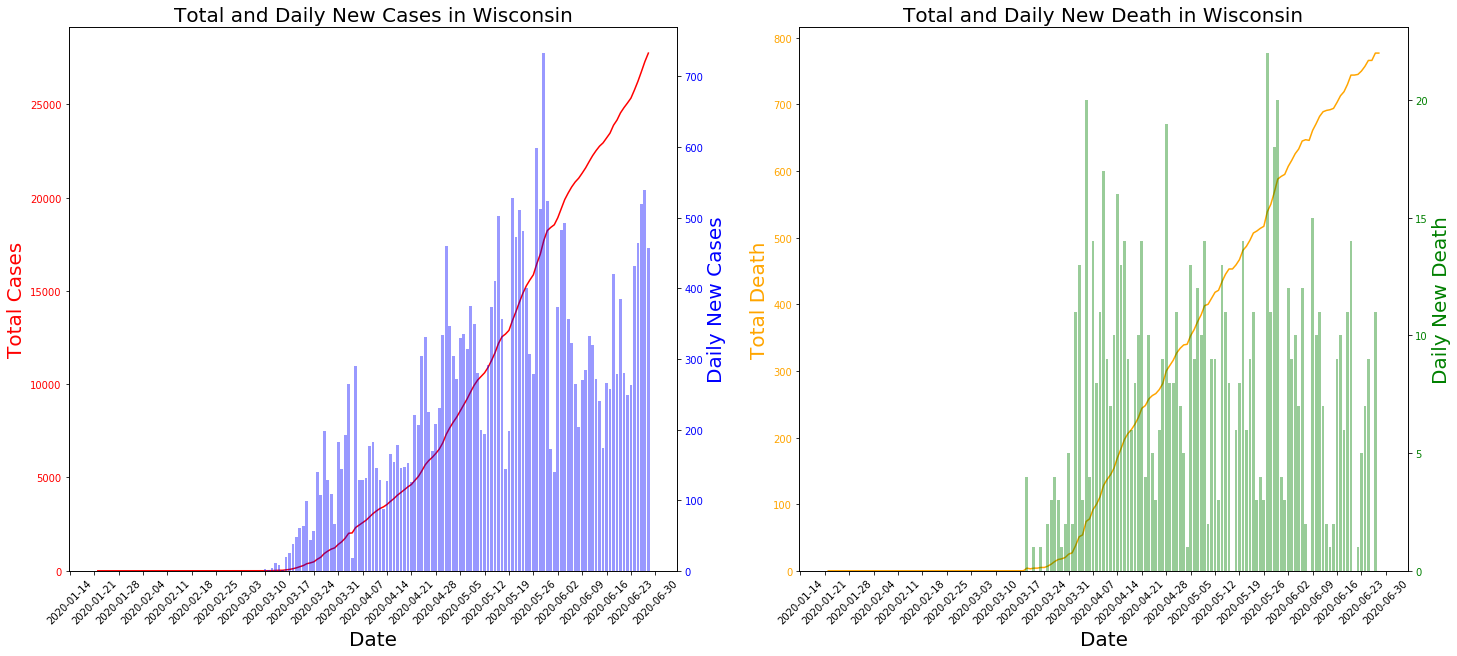

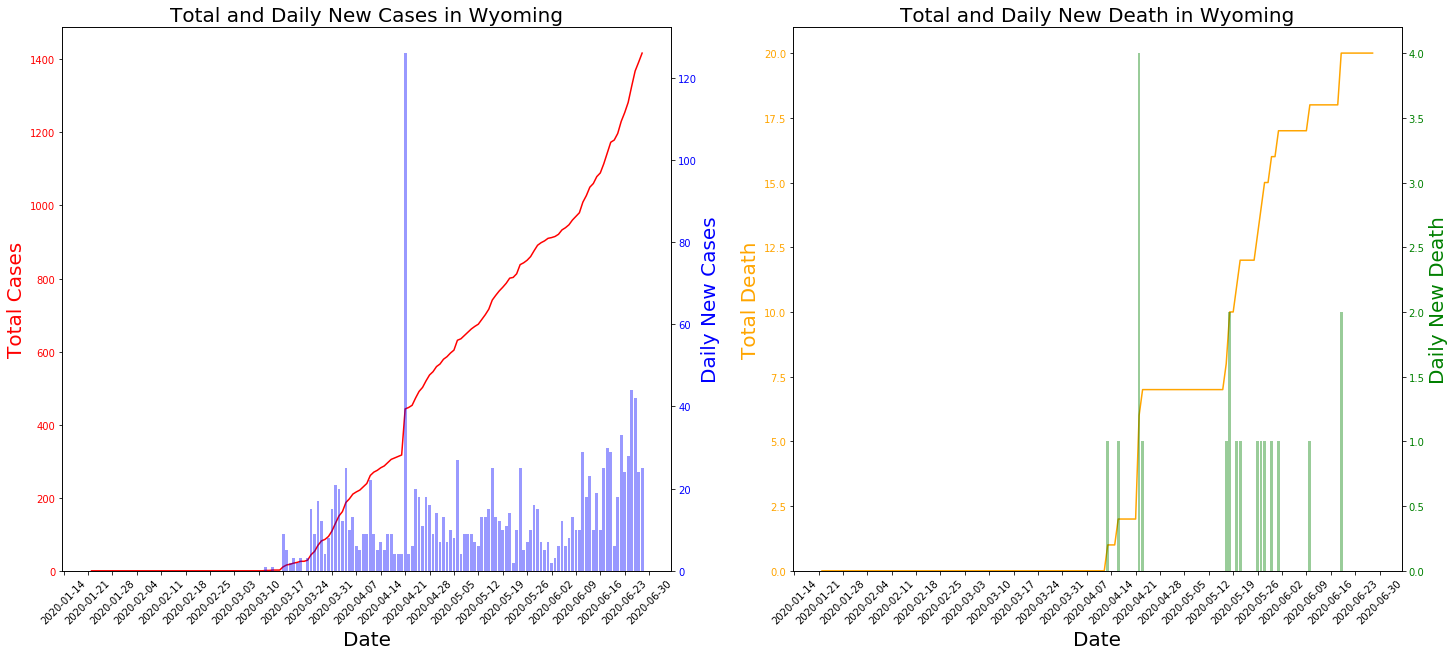

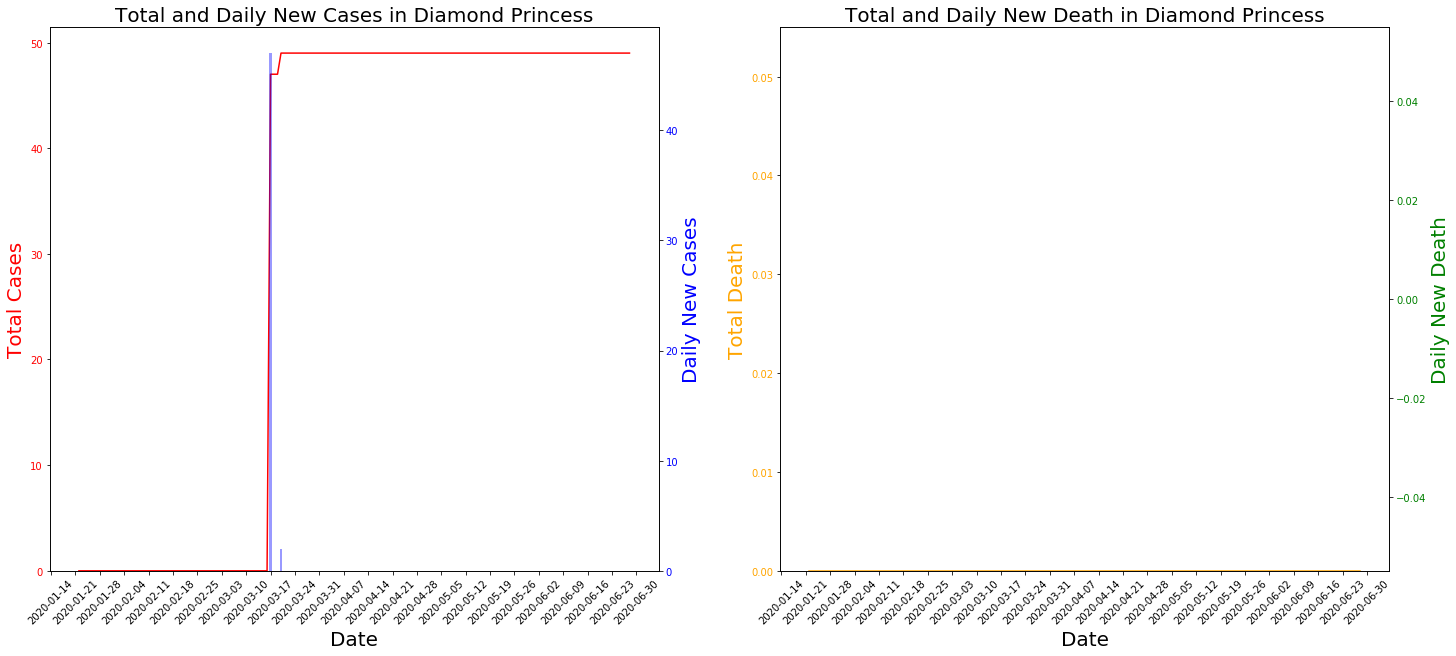

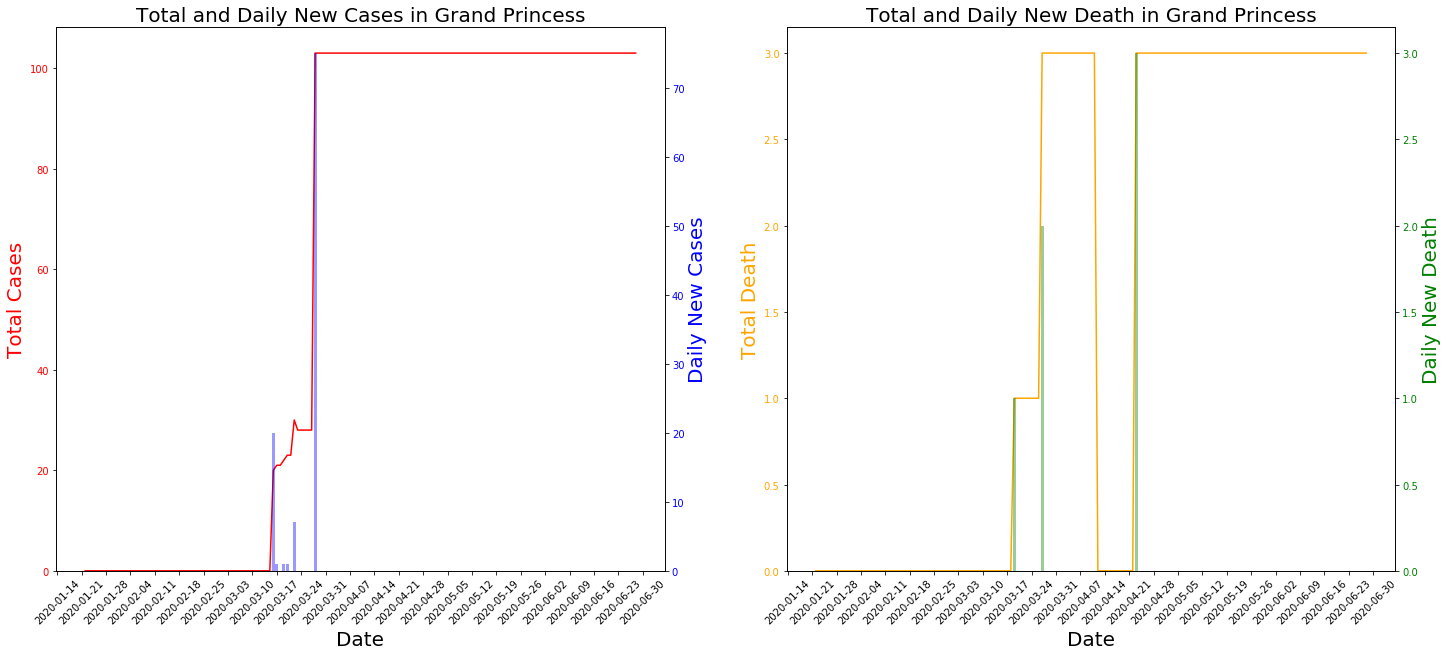

In [10]:
data = {}

for state in states:
    
    ### New cases
    state_new = confirmed_clean.loc[confirmed_clean['Province_State'] == state]
    state_new_agg = state_new.groupby('Date')[['Total Cases']].sum().reset_index()
    state_new_agg['New Cases'] = [state_new_agg['Total Cases'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(state_new_agg['Total Cases'][:-1],state_new_agg['Total Cases'][1:])]
    state_new_agg.set_index('Date',inplace = True)
    
    ### Death
    state_death = death_clean.loc[death_clean['Province_State']== state]
    state_death_agg = state_death.groupby('Date')[['Total Death']].sum().reset_index()
    state_death_agg['New Death'] =[state_death_agg['Total Death'][0]]+ \
                   [y-x if y>x else 0 for x,y in zip(state_death_agg['Total Death'][:-1],state_death_agg['Total Death'][1:])]
    state_death_agg.set_index('Date',inplace = True)
    
    data['%s' % state] = state_new_agg.merge(state_death_agg, left_index = True, right_index = True)
    data['%s' % state]['State'] = state
    data['%s' % state].reset_index(inplace = True)

    ### Plot
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
    ax2 = axs[0].twinx()
    ax3 = axs[1].twinx()
    axs[0].plot(data['%s' % state]['Date'], data['%s' % state]['Total Cases'], 'r-')
    axs[0].tick_params(axis = 'y', labelcolor='r')
    axs[0].tick_params(axis = 'x', labelrotation = 45)
    ax2.bar(data['%s' % state]['Date'],data['%s' % state]['New Cases'], color = 'b', alpha= 0.4)
    ax2.tick_params(axis = 'y',labelcolor='b')
    axs[0].set_ylim(0)

    axs[0].set_xlabel('Date',fontsize = 20)
    axs[0].set_ylabel('Total Cases', color='r',fontsize = 20)
    ax2.set_ylabel('Daily New Cases', color='b',fontsize = 20)
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[0].set_title('Total and Daily New Cases in %s' %state,fontsize = 20)

    
    axs[1].plot(data['%s' % state]['Date'], data['%s' % state]['Total Death'], '-',color = 'orange')
    axs[1].tick_params(axis = 'y', labelcolor='orange')
    axs[1].tick_params(axis = 'x', labelrotation = 45)
    ax3.bar(data['%s' % state]['Date'], data['%s' % state]['New Death'], color = 'green', alpha= 0.4)
    ax3.tick_params(axis = 'y',labelcolor='green')
    axs[1].set_ylim(0)

    axs[1].set_xlabel('Date',fontsize = 20)
    axs[1].set_ylabel('Total Death', color='orange',fontsize = 20)
    ax3.set_ylabel('Daily New Death', color='green',fontsize = 20)
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[1].set_title('Total and Daily New Death in %s' %state,fontsize = 20)
    plt.show();
    